In [13]:
# Проект 2. Разведывательный анализ данных
# Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике,
# чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('stud_math.csv')
# data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w+1))  -убрать???
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [15]:
# Смотрим сколько у нас признаков и с какого типа данными мы имеем дело.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
pstatus                350 non-null object
medu                   392 non-null float64
fedu                   371 non-null float64
mjob                   376 non-null object
fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [16]:
df.isnull().sum()
# Проверяем наличие пропусков. Пропуски есть, но их не критично много.

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [2]:
display(df['DESCR'])

KeyError: 'DESCR'

In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [17]:
# Меняем название столбцом на удобные нам:
df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
              'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
              'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
              'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
              'freetime', 'goout', 'health', 'absences', 'score']
df.columns  # Смотрим что получилось

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

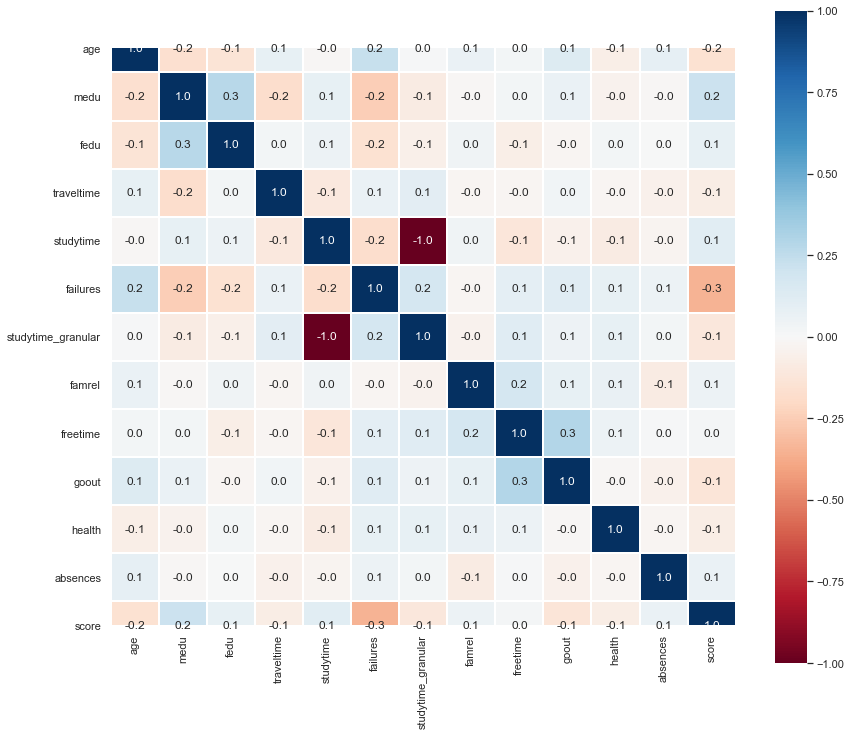

In [18]:
# Проверяем на мультиколлинеарность и кореляцию числовых признаков между собой и с главным признаком "score":
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
plt.subplots(figsize=(14, 12))
sns.heatmap(df.corr(), square=True, annot=True,
            fmt=".1f", linewidths=1, cmap="RdBu")

In [ ]:
# Коррелирующие с  "score" числовые показатели:
'age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'studytime_granular', 'famrel', 'freetime', 'goout', 'health', 'absences'
# НЕкоррелирующие с  "score" числовые показатели:
'freetime' (можно удалить)
# FEDU, MEDU умеренно коррелируют между собой. Можно попробовать удалить один из них. Удалим 'fedu'.
df.drop(['fedu'], inplace=True, axis=1)
# Сильно коррелирующие между собой показатели (мультиколинеарность):
'studytime' - 'studytime_granular'.  # Можно убрать один из показателей. Убираем 'studytime, granular'
df.drop(['studytime_granular'], inplace=True, axis=1)

In [52]:
# school - аббревиатура школы, в которой учится ученик. Признак  категориальный.
# Как видно, у этого признака нормальное распределение, выбросов нет. Пропусков нет.Показатель "школы" важный, оставить.
pd.DataFrame(df.school.value_counts())

,school
GP,349
MS,46


In [65]:
# sex — пол ученика ('F' - женский, 'M' - мужской). Признак  категориальный.
# Как видно, у этого признака нормальное распределение, выбросов нет. Пропусков нет.Показатель -важный?
pd.DataFrame(df.sex.value_counts())

,sex
F,208
M,187


In [53]:
# age - показатель возраста ученика. Признак числовой.Важный, оставляем.
pd.DataFrame(df.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

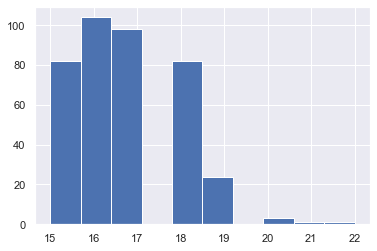

In [12]:
df.age.hist()
df.age.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет.Пропусков нет.

In [17]:
# address- Признак "тип адреса ученика ('U' - городской, 'R' - за городом)". Признак  категориальный.
pd.DataFrame(df.address.value_counts())

,address
U,295
R,83


count     378
unique      2
top         U
freq      295
Name: address, dtype: object

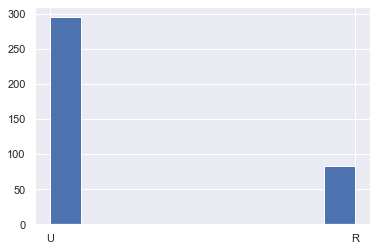

In [14]:
df.address.hist()
df.address.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет. Есть пропуски - заполнить нет возможности.
# Можно удалить строки с пропусками.
df.address.dropna(axis=0, how='all', inplace=True)

In [18]:
# Признак famsize - размер семьи('LE3' <= 3, 'GT3' >3). Признак категориальный.
pd.DataFrame(df.famsize.value_counts())

,famsize
GT3,261
LE3,107


count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

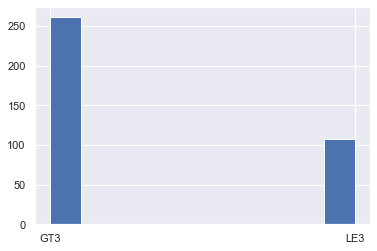

In [15]:
df.famsize.hist()
df.famsize.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.Есть пропуски (27) - заполнить нет возможности (?).
# Можно удалить cтроки с пропусками.
df.famsize.dropna(axis=0, how='all', inplace=True)

In [25]:
# Признак pstatus - статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно). Признак категориальный.
pd.DataFrame(df.pstatus.value_counts())

,pstatus
T,314
A,36


count     350
unique      2
top         T
freq      314
Name: pstatus, dtype: object

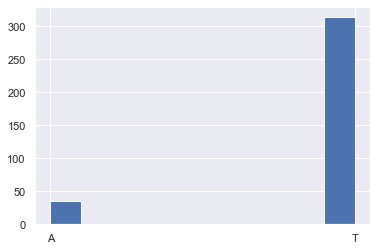

In [13]:
df.pstatus.hist()
df.pstatus.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет.Есть пропуски (45) - заполнить нет возможности.
# Можно удалить cтроки с пропусками или заполнить чаще встречающимся значением ("Т"), но тогда возможен перекос в сторону Т.
# Лучше удалим.
df.pstatus.dropna(axis=0, how='all', inplace=True)

In [12]:
# Признак medu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Признак бинарный, но по сути категориальный.
# Признак  числовой, но по сути категориальный.
pd.DataFrame(df.medu.value_counts())

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

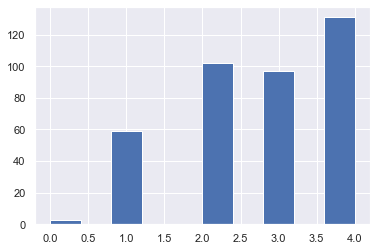

In [14]:
df.medu.hist()
df.medu.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.

In [5]:
# Есть пропуски - заполнить нет возможности.
# Можно строки с пропусками (3шт)  - заменить на часто встречающиеся.
# df['medu'].value_counts().index[0]
-> 4.0
# df[['medu']].fillna(4.0)
# или:
df[['medu']].fillna(df['medu'].value_counts().index[0])

4.0

In [4]:
# Признак fedu - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Признак бинарный, но по сути категориальный.
# Признак  числовой, но по сути категориальный.
pd.DataFrame(df.fedu.value_counts())  # -удаляем как дублирующий признак.?

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

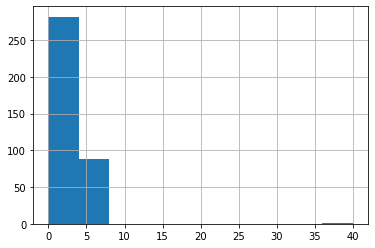

In [6]:
df.fedu.hist()
df.fedu.describe()
# Как видно, у этого признака нормальное распределение, выбросы есть - значение 40.
# Его надо заменить на реальное(например самое частое  или предположительное -"4")
df['fedu'] = df['fedu'].replace(40, 4)
# Есть пропуски - заполнить нет возможности.
# Можно строки с пропусками (24шт)  - заменить на самое частое() или удалить. Голосуем за - удалить.
df.fedu.dropna(axis=0, how='all', inplace=True)

In [22]:
# Признак mjob - работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# Признак  категориальный.
pd.DataFrame(df.mjob.value_counts())

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


count       376
unique        5
top       other
freq        133
Name: mjob, dtype: object

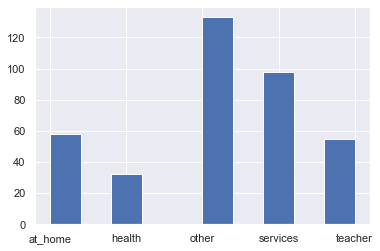

In [26]:
df.mjob.hist()
df.mjob.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски  - заполнить нет возможности.
# Можно удалить cтроки с пропусками (19 шт.)
df.mjob.dropna(axis=0, how='all', inplace=True)

count       359
unique        5
top       other
freq        197
Name: fjob, dtype: object

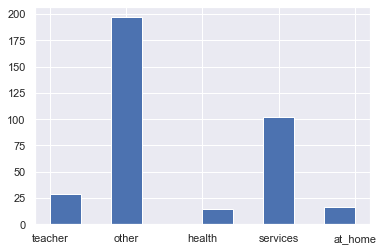

In [27]:
# Признак Fjob - работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# Признак  категориальный.
pd.DataFrame(df.fjob.value_counts())
df.fjob.hist()
df.fjob.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (36 шт).
df[['fjob']].dropna(axis=0)

In [25]:
# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
# Признак  категориальный.
pd.DataFrame(df.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

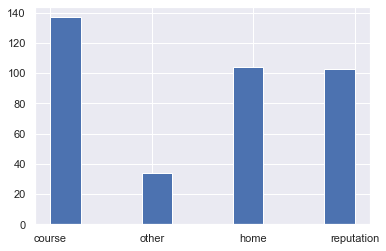

In [28]:
df.reason.hist()
df.reason.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками.
df.reason.dropna(axis=0, how='all', inplace=True)

In [26]:
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
# Признак  категориальный.
pd.DataFrame(df.guardian.value_counts())

,guardian
mother,250
father,86
other,28


count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

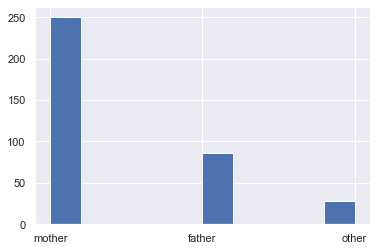

In [30]:
df.guardian.hist()
df.guardian.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками.
df.guardian.dropna(axis=0, how='all', inplace=True)

In [4]:
# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# Признак  числовой, но по сути категориальный.
pd.DataFrame(df.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

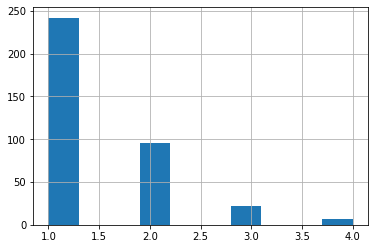

In [18]:
df.traveltime.hist()
df.traveltime.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками.
df.traveltime.dropna(axis=0, how='all', inplace=True)

In [11]:
# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# Признак  числовой, но по сути категориальный.
pd.DataFrame(df.studytime.value_counts())

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

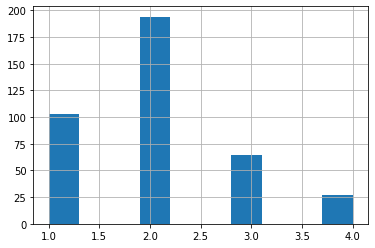

In [17]:
df.studytime.hist()
df.studytime.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками.
df.studytime.dropna(axis=0, how='all', inplace=True)

In [13]:
# failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
# Признак  числовой, но по сути категориальный.
pd.DataFrame(df.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

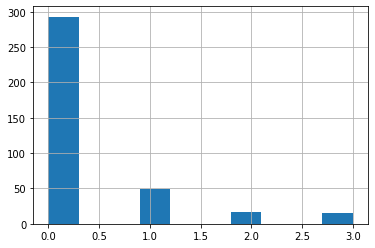

In [16]:
df.failures.hist()
df.failures.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками.
df.failures.dropna(axis=0, how='all', inplace=True)

In [20]:
# schoolsup — дополнительная образовательная поддержка (yes или no).
# Признак  категориальный.
pd.DataFrame(df.schoolsup.value_counts())

,schoolsup
no,335
yes,51


count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

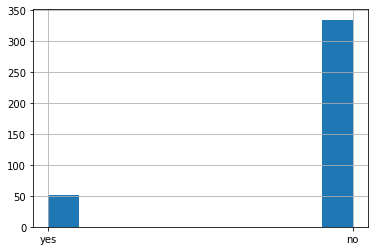

In [22]:
df.schoolsup.hist()
df.schoolsup.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (9 шт.).
df.schoolsup.dropna(axis=0, how='all', inplace=True)

In [23]:
# famsup — семейная образовательная поддержка (yes или no)
# Признак  категориальный.
pd.DataFrame(df.famsup.value_counts())

,famsup
yes,219
no,137


count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

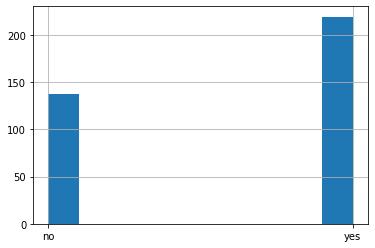

In [25]:
df.famsup.hist()
df.famsup.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (39 шт.).
df.famsup.dropna(axis=0, how='all', inplace=True)

In [26]:
# paid — дополнительные платные занятия по математике (yes или no)
# Признак  категориальный.
pd.DataFrame(df.paid.value_counts())

,paid
no,200
yes,155


count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

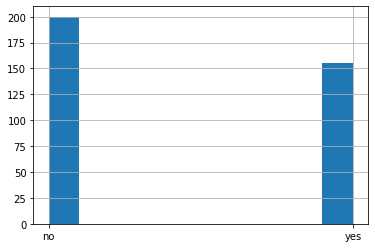

In [27]:
df.paid.hist()
df.paid.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (40 шт.).
# df[['paid']].dropna(axis=0)
df.paid.dropna(axis=0, how='all', inplace=True)

In [31]:
# studytime_ granular — ??? описания нет. Признак сильно коррелирует с studytime (отрицательная корреляция -1).
# Признак числовой, но по сути категориальный.
pd.DataFrame(df.studytime_granular.value_counts())

,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

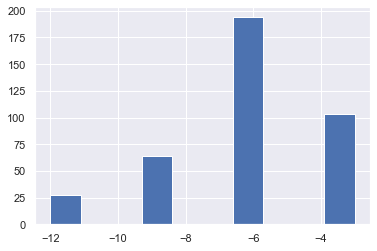

In [32]:
df.studytime_granular.hist()
df.studytime_granular.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (7 шт.).
df.studytime_granular.dropna(axis=0, how='all', inplace=True)

In [33]:
# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# Признак числовой, но по сути категориальный.
pd.DataFrame(df.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

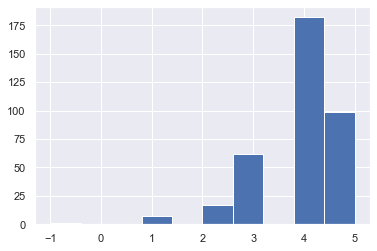

In [35]:
df.famrel.hist()
df.famrel.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (27 шт.).
df.famrel.dropna(axis=0, how='all', inplace=True)

In [36]:
# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
# Признак числовой, но по сути категориальный.
pd.DataFrame(df.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

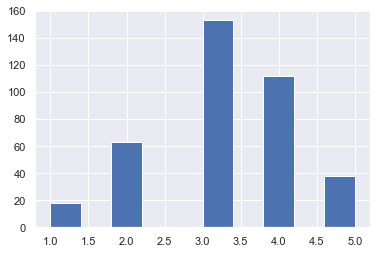

In [37]:
df.freetime.hist()
df.freetime.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (11 шт.).
# df[['freetime']].dropna(axis=0)
df.freetime.dropna(axis=0, how='all', inplace=True)

In [38]:
# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
# Признак числовой, но по сути категориальный.
pd.DataFrame(df.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

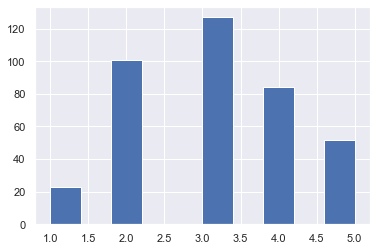

In [39]:
df.goout.hist()
df.goout.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (11 шт.).
df.goout.dropna(axis=0, how='all', inplace=True)

In [40]:
# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# Признак числовой, но по сути категориальный.
pd.DataFrame(df.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


count    395.000000
mean       3.673900
std        1.545675
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.279373
Name: health, dtype: float64

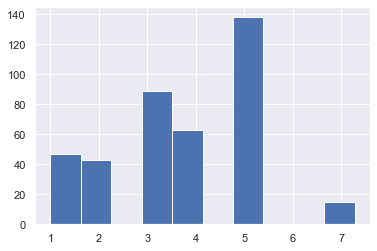

In [54]:
df.health.hist()
df.health.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (15 шт.).
df.health.dropna(axis=0, how='all', inplace=True)

In [42]:
# absences — количество пропущенных занятий.
# Признак числовой.
pd.DataFrame(df.absences.value_counts())

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

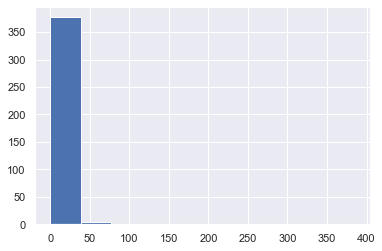

In [43]:
df.absences.hist()
df.absences.describe()
# как видно, у этого признака нормальное распределение, выбросы есть - "385" и "212". Заменить "mean"/среднее значение.
# Есть пропуски (12 шт) - заполнить можно средним значением.
# - заполняем пропуски средним арифм значением колонки
mean = df['absences'].mean()
df.fillna(mean, inplace=True)
df['absences'] = df['absences'].replace(385, mean)
df['absences'] = df['absences'].replace(212, mean)

count    395.000000
mean       5.804839
std        7.948577
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

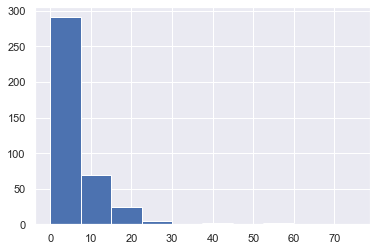

In [45]:
# - заполняем пропуски средним арифм значением колонки
mean = df['absences'].mean()
df.fillna(mean, inplace=True)
df['absences'] = df['absences'].replace(385, mean)
df['absences'] = df['absences'].replace(212, mean)
df.absences.hist()
df.absences.describe()

In [55]:
# score — баллы по госэкзамену по математике. Признак - предсказываемая величина.
# Признак числовой.
pd.DataFrame(df.score.value_counts())

,score
50.000000,54
55.000000,46
0.000000,37
75.000000,33
65.000000,31
40.000000,31
60.000000,31
45.000000,27
70.000000,27
80.000000,16


count    395.000000
mean      51.578927
std       23.401461
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

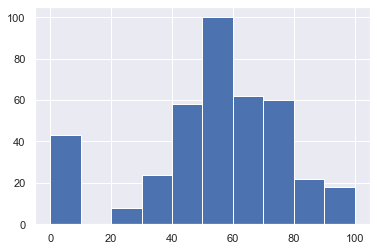

In [56]:
df.score.hist()
df.score.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски (6 шт) - заполнить можно средним значением.
# - заполняем пропуски средним арифм значением колонки
mean = df['score'].mean()
df.fillna(mean, inplace=True)

In [28]:
# Cоздадим итоговый датафрейм очищенный от пропусков и ненужных признаков:
# Дропнуть  пропуски в столбцах можно и одной командой сразу во всех нужных столбцах:
# df[['fjob', "famsize","pstatus",.....]].dropna( inplace=True,axis=0)
df.address.dropna(axis=0, how='all', inplace=True)
df.famsize.dropna(axis=0, how='all', inplace=True)
df.pstatus.dropna(axis=0, how='all', inplace=True)
df[['medu']].fillna(df['medu'].value_counts().index[0])
df['fedu'] = df['fedu'].replace(40, 4)
df.fedu.dropna(axis=0, how='all', inplace=True)
df.mjob.dropna(axis=0, how='all', inplace=True)
df.fjob.dropna(axis=0, how='all', inplace=True)
df[['fjob']].dropna(axis=0)
df.reason.dropna(axis=0, how='all', inplace=True)
df.guardian.dropna(axis=0, how='all', inplace=True)
df.traveltime.dropna(axis=0, how='all', inplace=True)
df.studytime.dropna(axis=0, how='all', inplace=True)
df.failures.dropna(axis=0, how='all', inplace=True)
df.schoolsup.dropna(axis=0, how='all', inplace=True)
df.famsup.dropna(axis=0, how='all', inplace=True)
df.paid.dropna(axis=0, how='all', inplace=True)
df.activities.dropna(axis=0, how='all', inplace=True)
df.nursery.dropna(axis=0, how='all', inplace=True)
df.higher.dropna(axis=0, how='all', inplace=True)
df.internet.dropna(axis=0, how='all', inplace=True)
df.romantic.dropna(axis=0, how='all', inplace=True)

df.studytime_granular.dropna(axis=0, how='all', inplace=True)
df.famrel.dropna(axis=0, how='all', inplace=True)
#df.freetime.dropna(axis=0, how='all', inplace=True)
df.goout.dropna(axis=0, how='all', inplace=True)
df.health.dropna(axis=0, how='all', inplace=True)

mean1 = df['absences'].mean()
df.fillna(mean1, inplace=True)
df['absences'] = df['absences'].replace(385, mean)
df['absences'] = df['absences'].replace(212, mean)
mean2 = df['score'].mean()
#df.drop(['fedu'], inplace=True, axis=1)
df.drop(['freetime'], inplace=True, axis=1)
df.fillna(mean2, inplace=True)
df.isnull().sum()

school                0
sex                   0
age                   0
address               0
famsize               0
pstatus               0
medu                  0
fedu                  0
mjob                  0
fjob                  0
reason                0
guardian              0
traveltime            0
studytime             0
failures              0
schoolsup             0
famsup                0
paid                  0
activities            0
nursery               0
studytime_granular    0
higher                0
internet              0
romantic              0
famrel                0
goout                 0
health                0
absences              0
score                 0
dtype: int64

In [29]:
# смотрим коррелляцию числовых признаков между собой.
df.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,goout,health,absences,score
age,1.000000,-0.152519,-0.130992,-0.006761,-0.020277,0.017573,0.005015,0.054891,0.128054,-0.050148,0.164870,-0.182704
medu,-0.152519,1.000000,0.411566,-0.102529,0.040996,-0.043349,-0.053674,-0.012108,0.065263,-0.093161,0.081149,0.187195
fedu,-0.130992,0.411566,1.000000,-0.044170,0.007591,0.003066,-0.049164,0.003044,0.009108,0.046236,0.040266,0.099088
traveltime,-0.006761,-0.102529,-0.044170,1.000000,-0.022212,0.050811,0.057459,-0.013494,-0.060765,0.111263,-0.069713,-0.072331
studytime,-0.020277,0.040996,0.007591,-0.022212,1.000000,-0.044044,-0.259996,0.016471,-0.014547,-0.020813,-0.046124,0.139407
failures,0.017573,-0.043349,0.003066,0.050811,-0.044044,1.000000,0.118477,0.000178,0.037286,0.051028,0.042158,-0.089550
studytime_granular,0.005015,-0.053674,-0.049164,0.057459,-0.259996,0.118477,1.000000,-0.020640,0.028275,0.046443,0.060841,-0.035695
famrel,0.054891,-0.012108,0.003044,-0.013494,0.016471,0.000178,-0.020640,1.000000,0.020628,0.105711,0.003147,0.026960
goout,0.128054,0.065263,0.009108,-0.060765,-0.014547,0.037286,0.028275,0.020628,1.000000,-0.028317,0.022524,-0.161303
health,-0.050148,-0.093161,0.046236,0.111263,-0.020813,0.051028,0.046443,0.105711,-0.028317,1.000000,-0.042472,-0.087860


In [ ]:
# можно убрать сильно скореллированные: сильной корреляции между числовыми признаками НЕТ. 
#Fedu & Medu относительно коррелируют между собой. Можно удалить Fedu.(?)

In [31]:
# Выясним, какие столбцы коррелируют с оценкой по математике ("score").
# Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

# Корреляции рассмотрим только для числовых столбцов.

# Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:
# Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

SyntaxError: invalid syntax (<ipython-input-31-3745e9496c2d>, line 1)

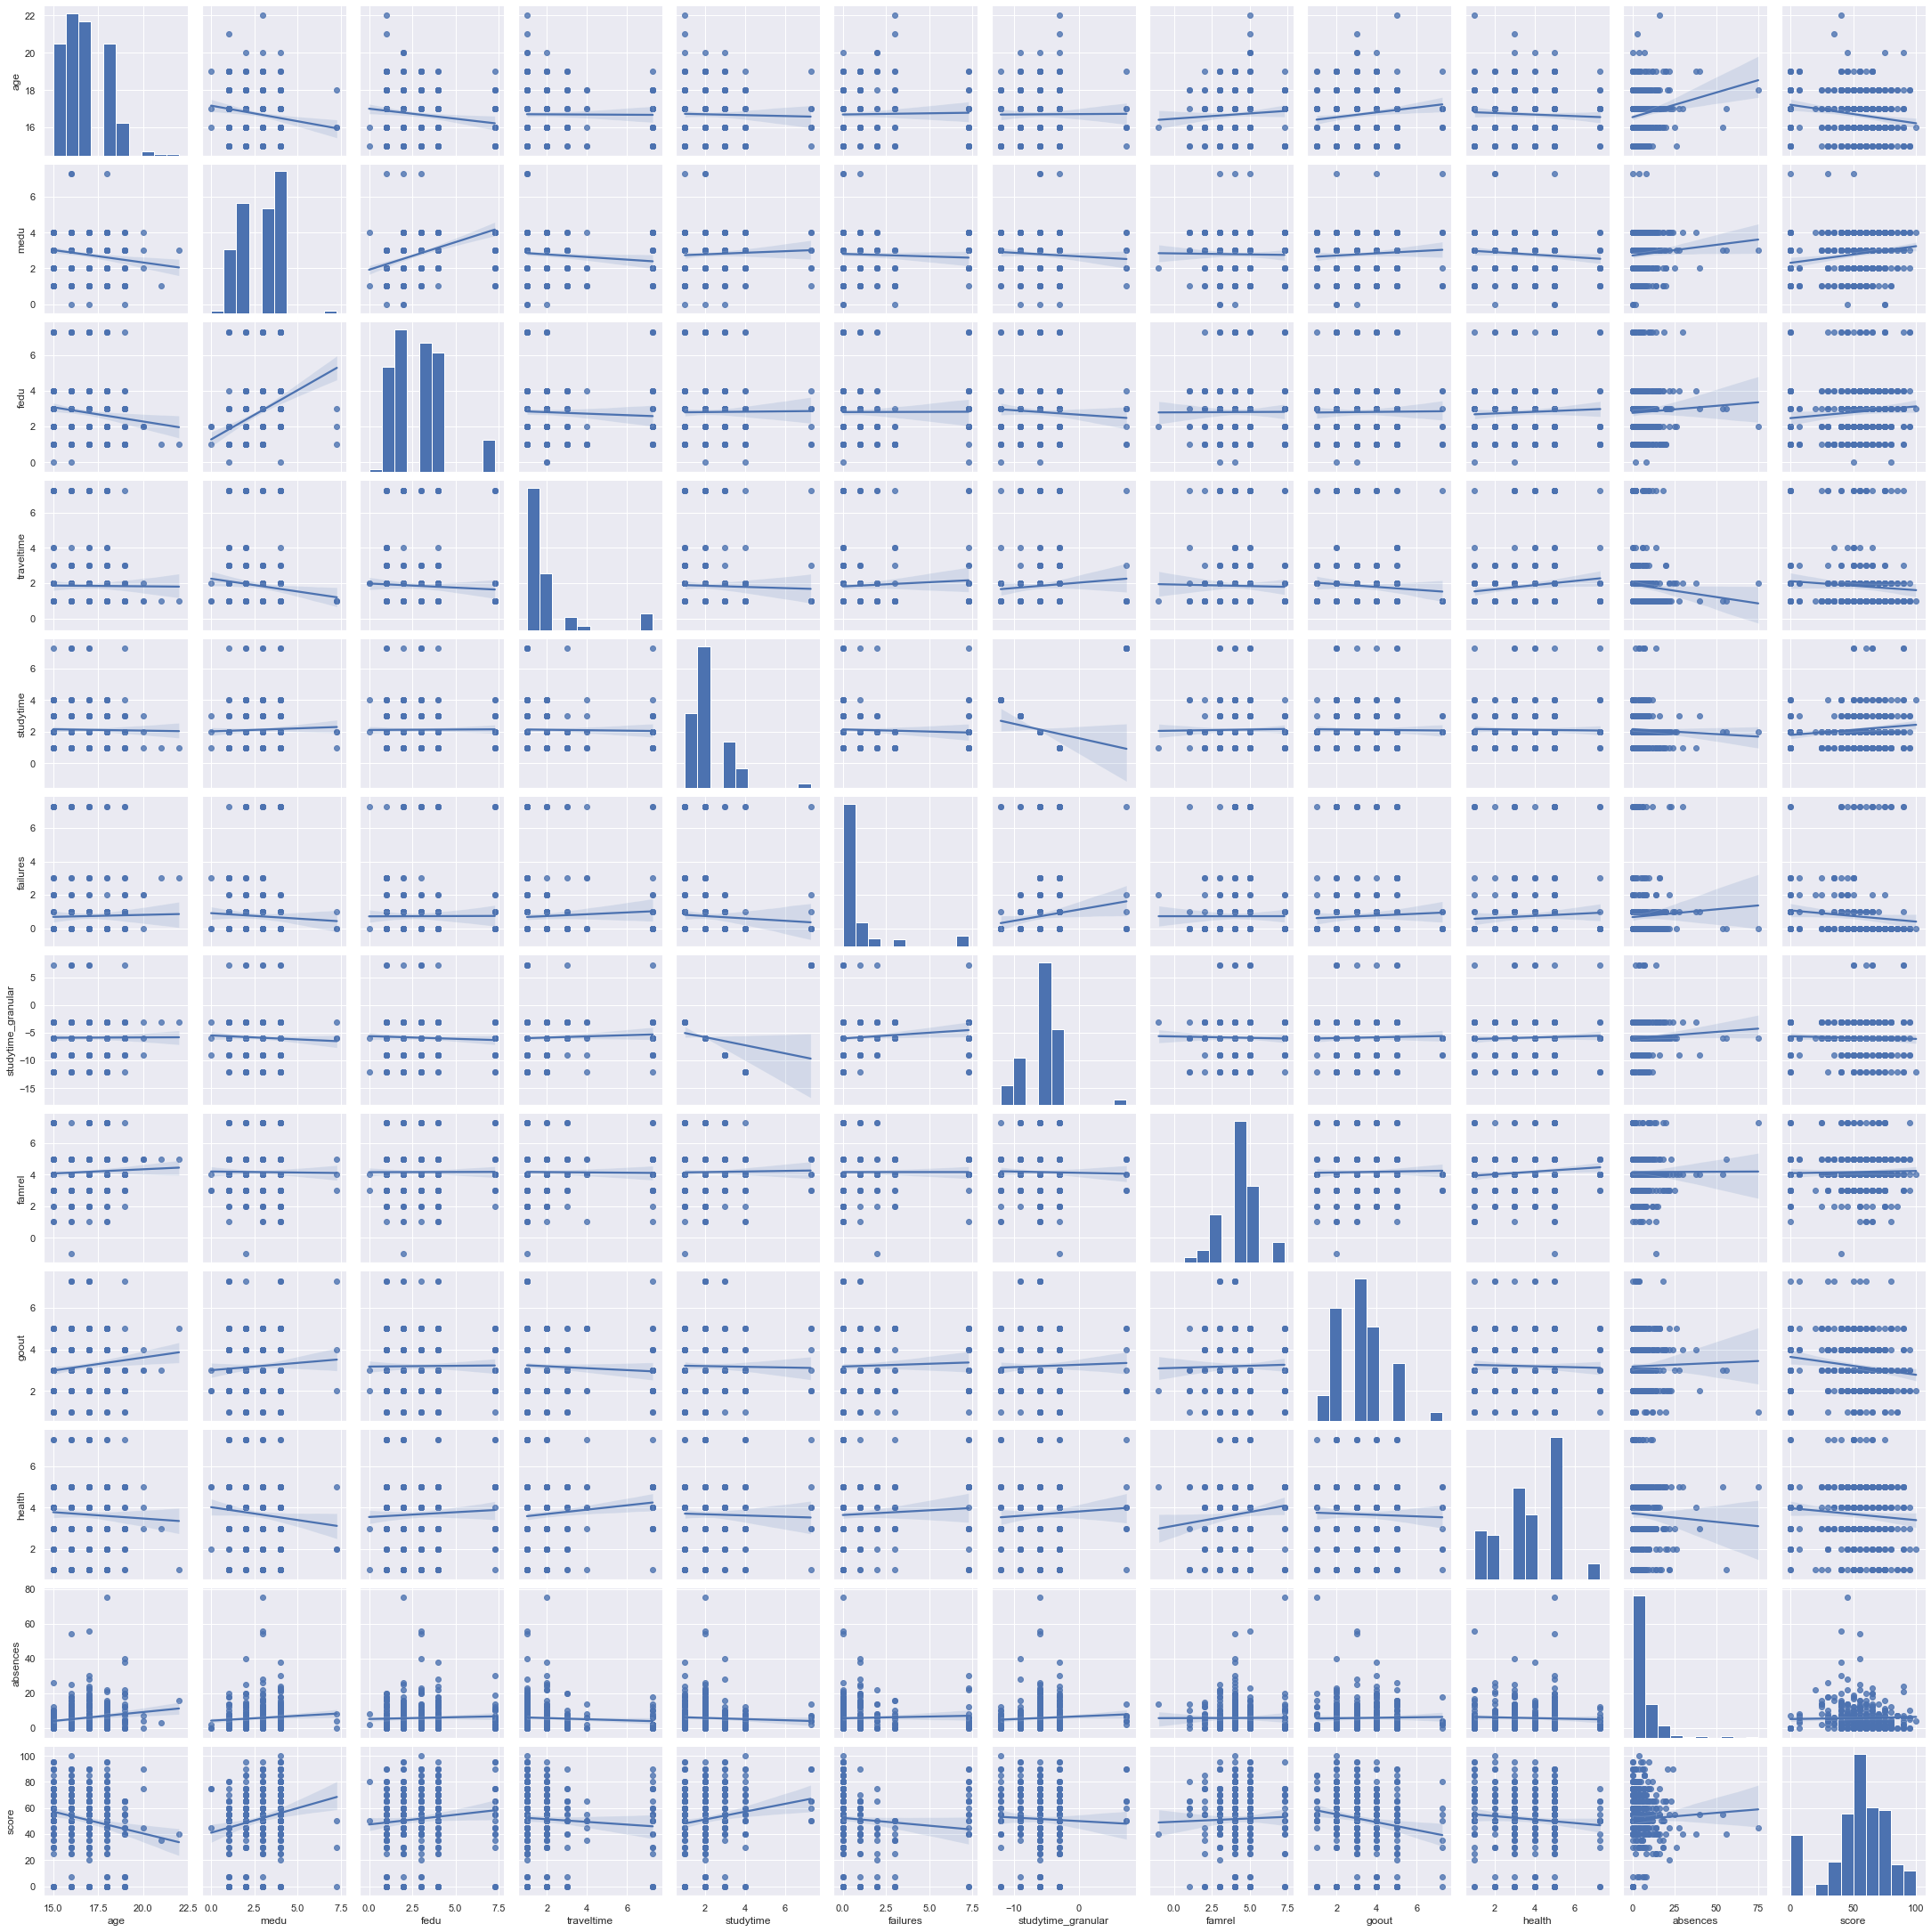

In [30]:
sns.pairplot(df, kind = 'reg')

In [ ]:
Останутся X слабоскоррелированные с оценкой по математике ("score") переменные: cocoa_percent и review_date.

Выводы: Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, 
что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются.

In [34]:
# Анализ номинативных признаков:
# Очевидно, что для номинативных переменных использовать корреляционный анализ не получится.
# Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например,
# с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

In [ ]:
# Номинативные переменные, которые осталось рассмотреть:
'sex', 'address', 'famsize', 'pstatus', 'mjob',
'fjob', 'reason', 'guardian',
'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
'higher', 'internet', 'romantic'
# и бинарные категориальные:
"health",  "goout", "freetime", "famrel", "studytime_granular", "failures", "studytime","traveltime"

In [31]:
# - напишем функцию
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(25, 10))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

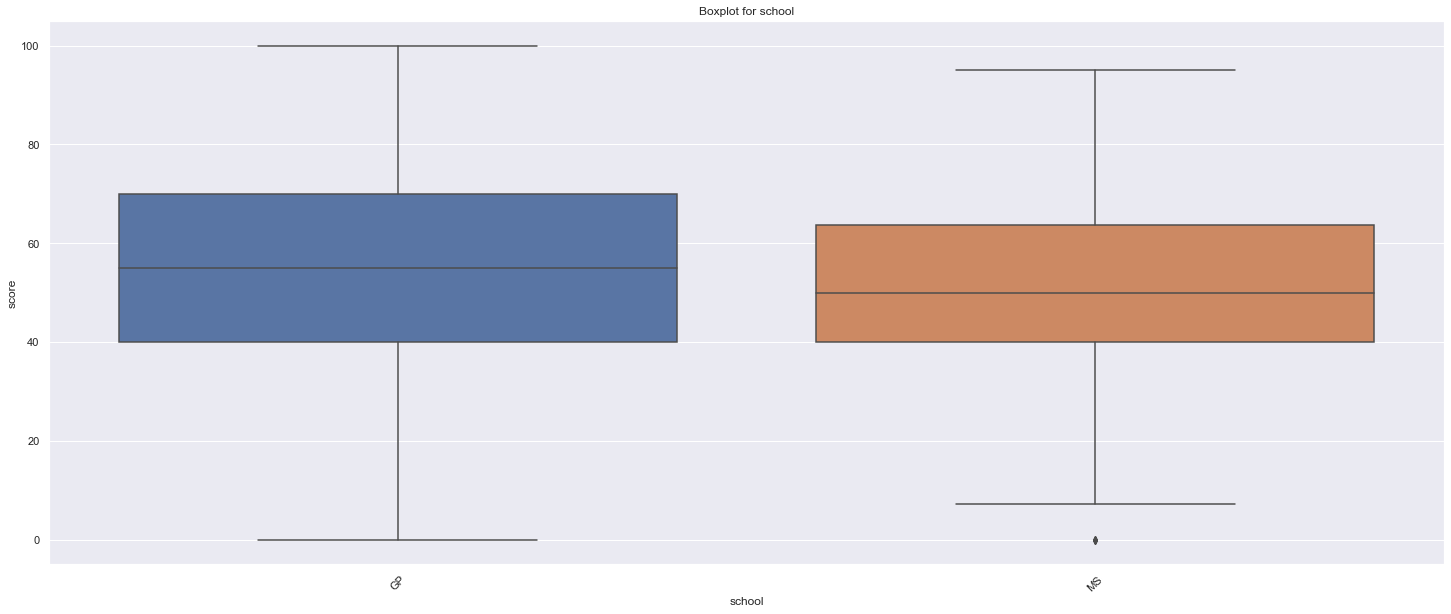

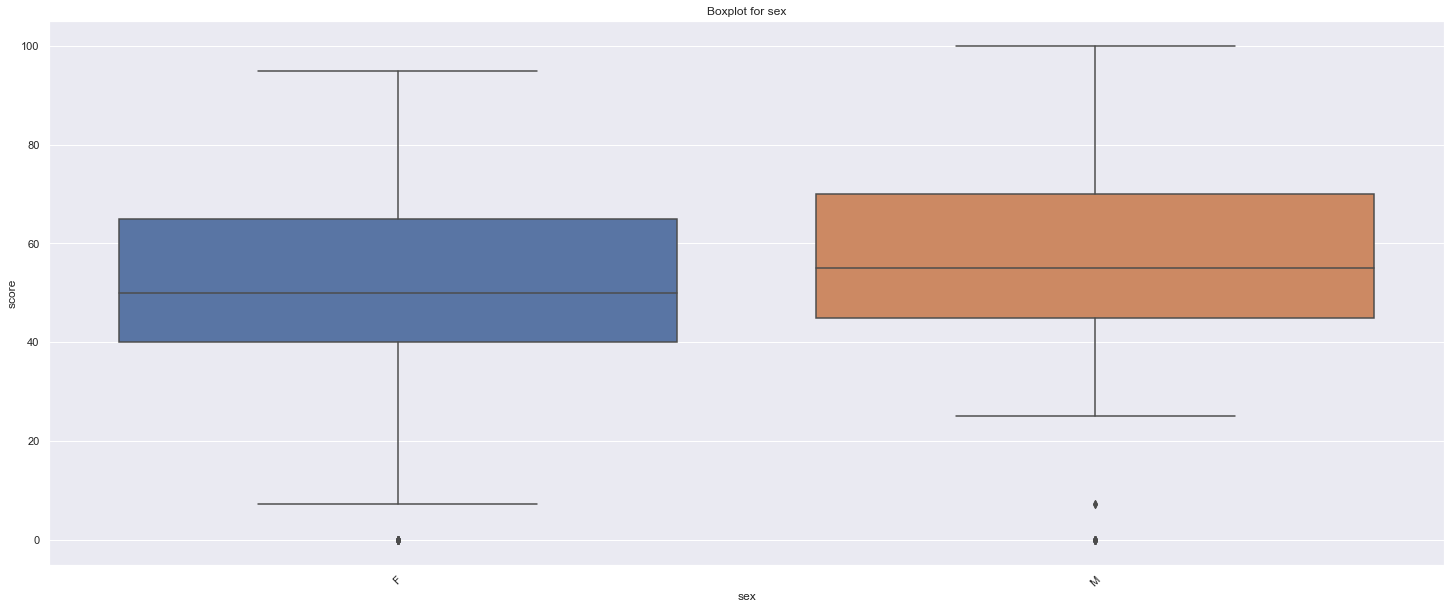

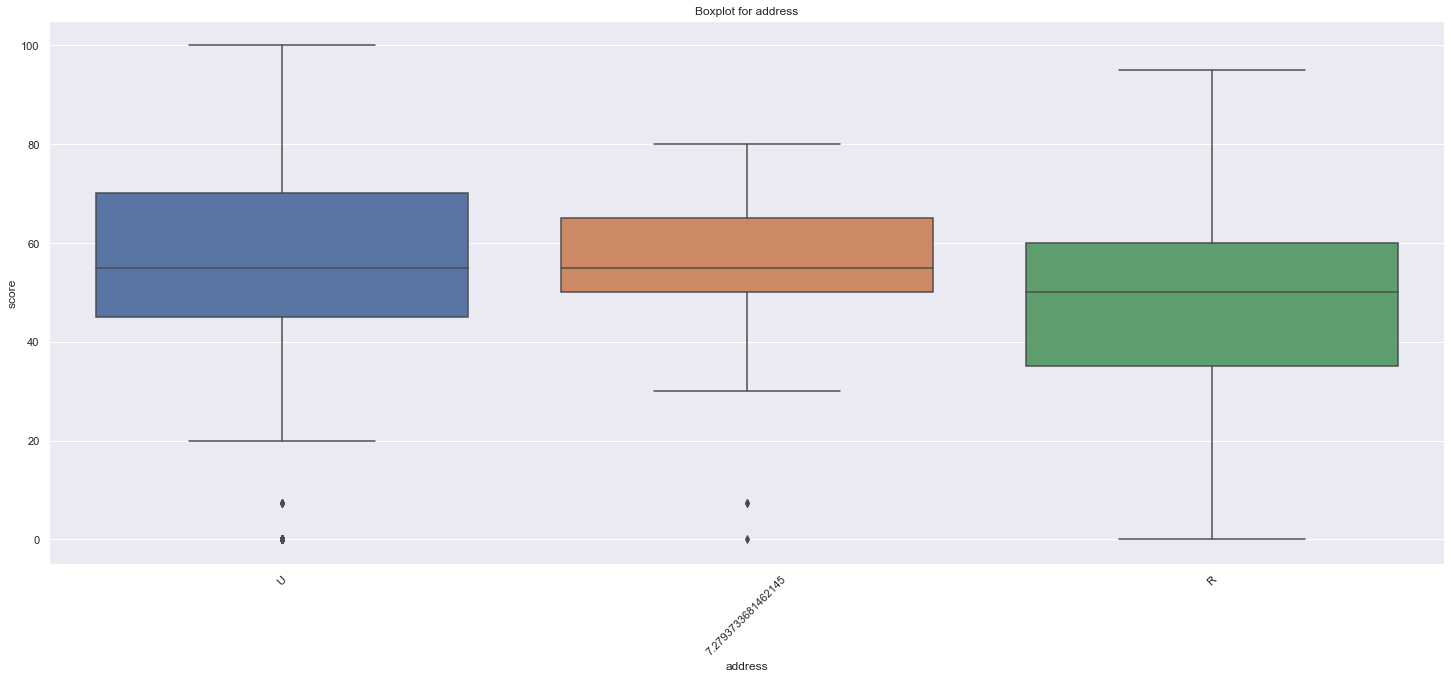

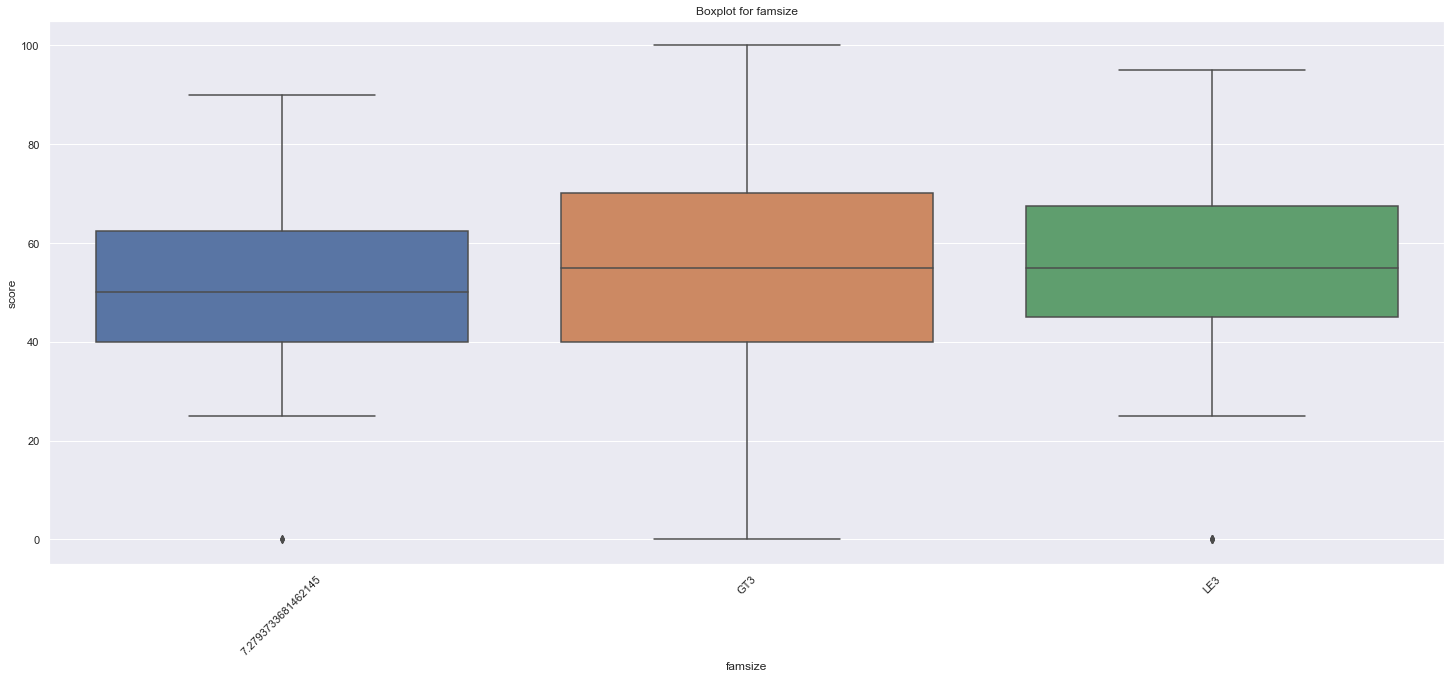

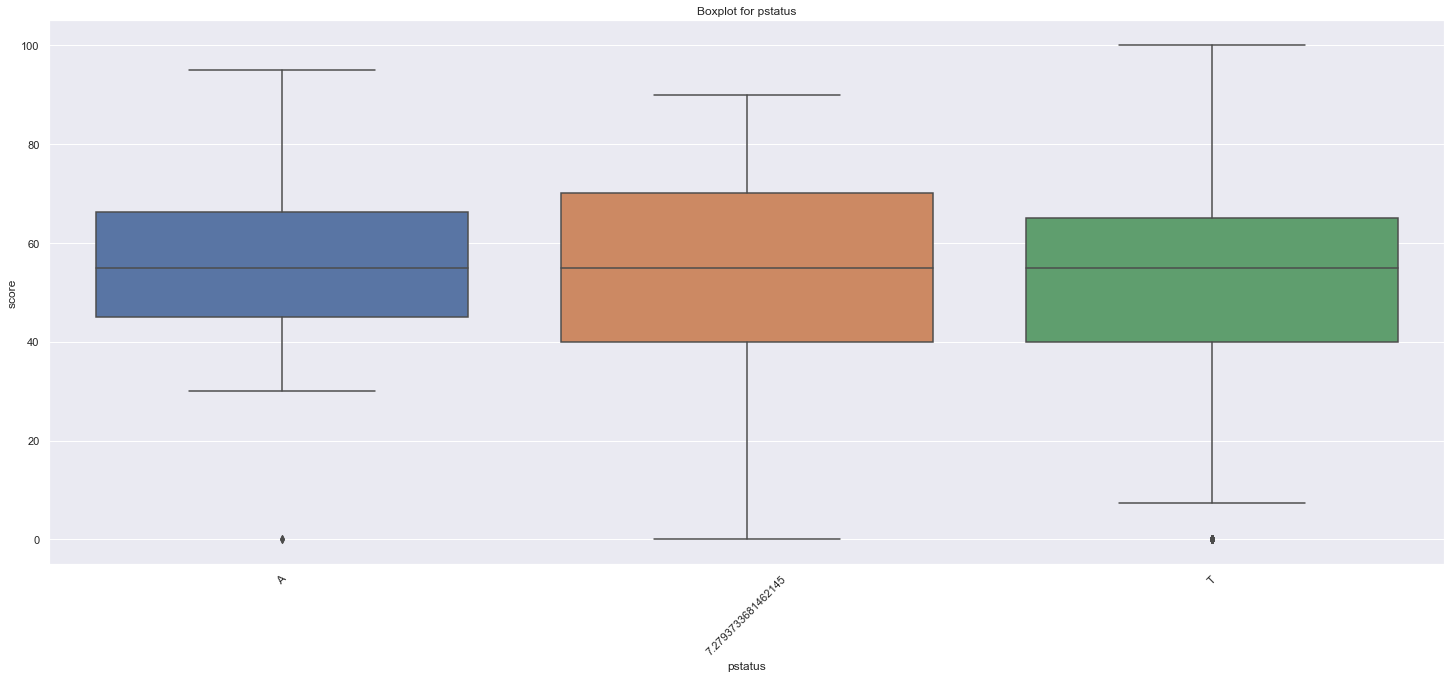

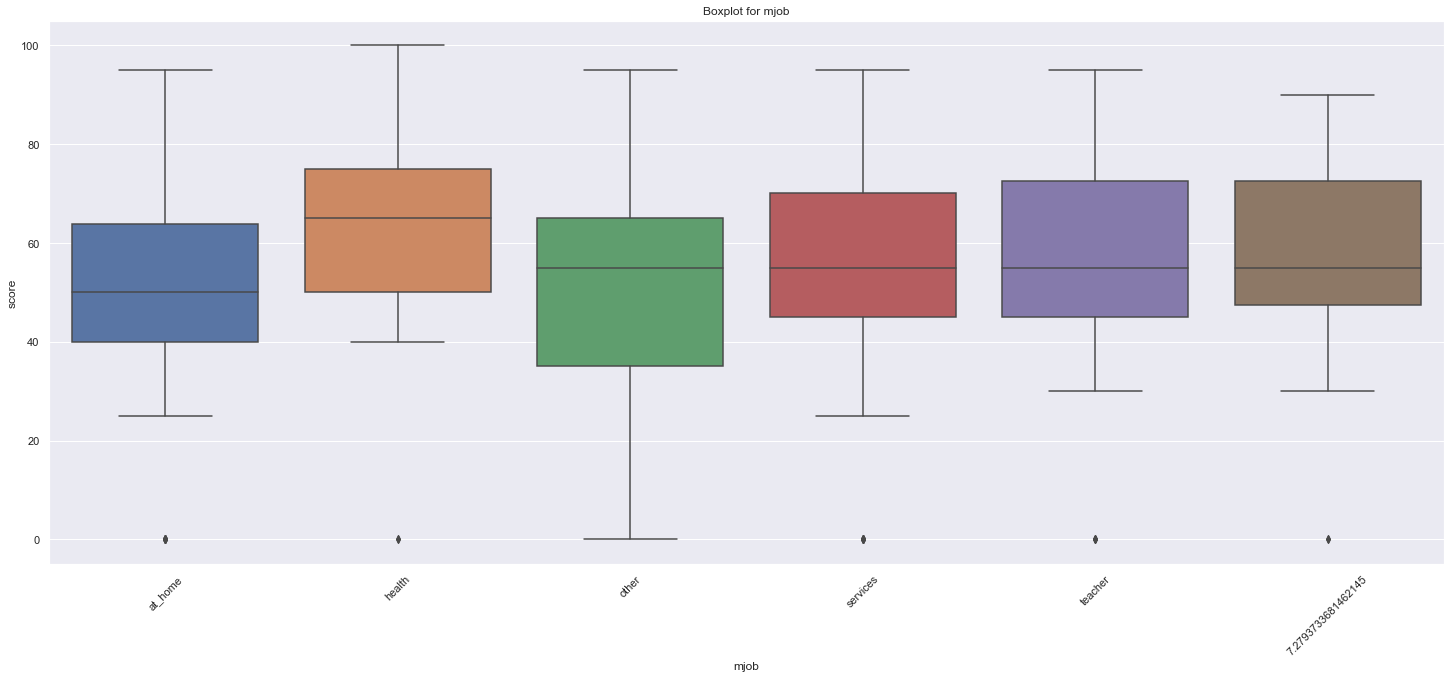

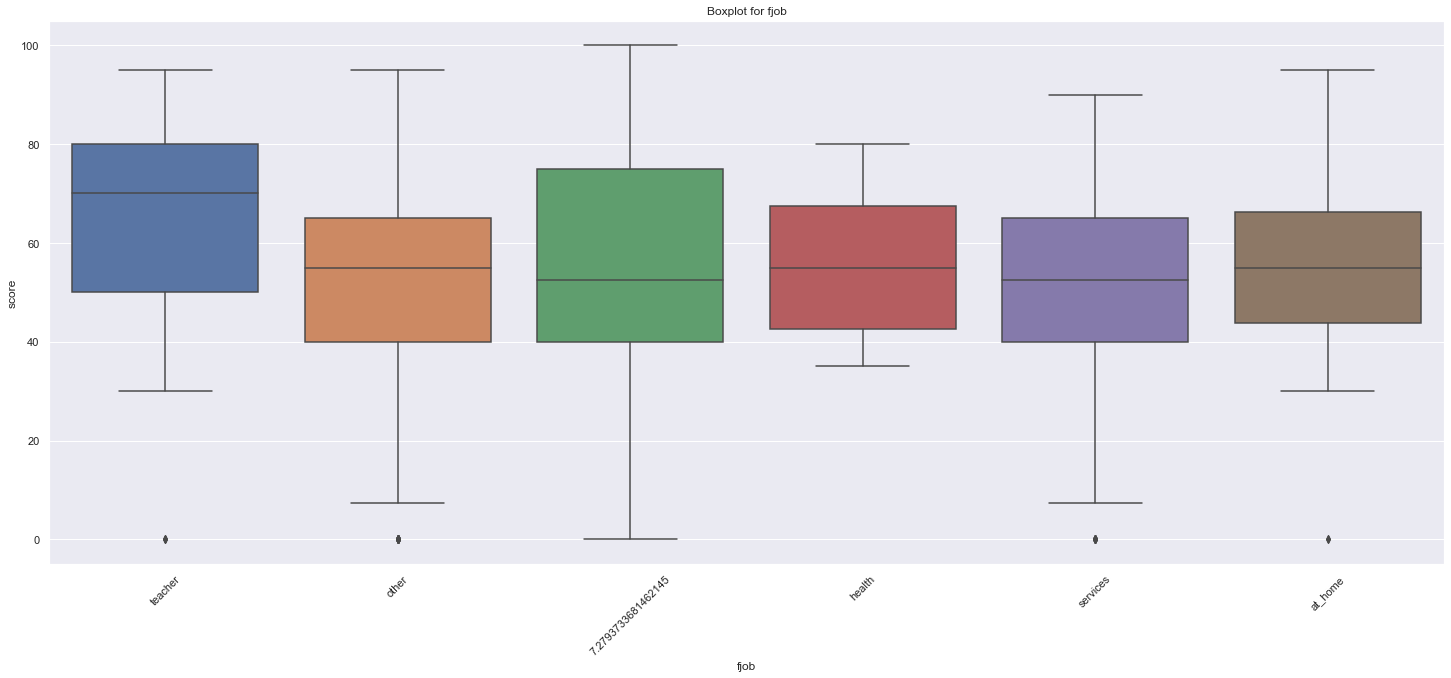

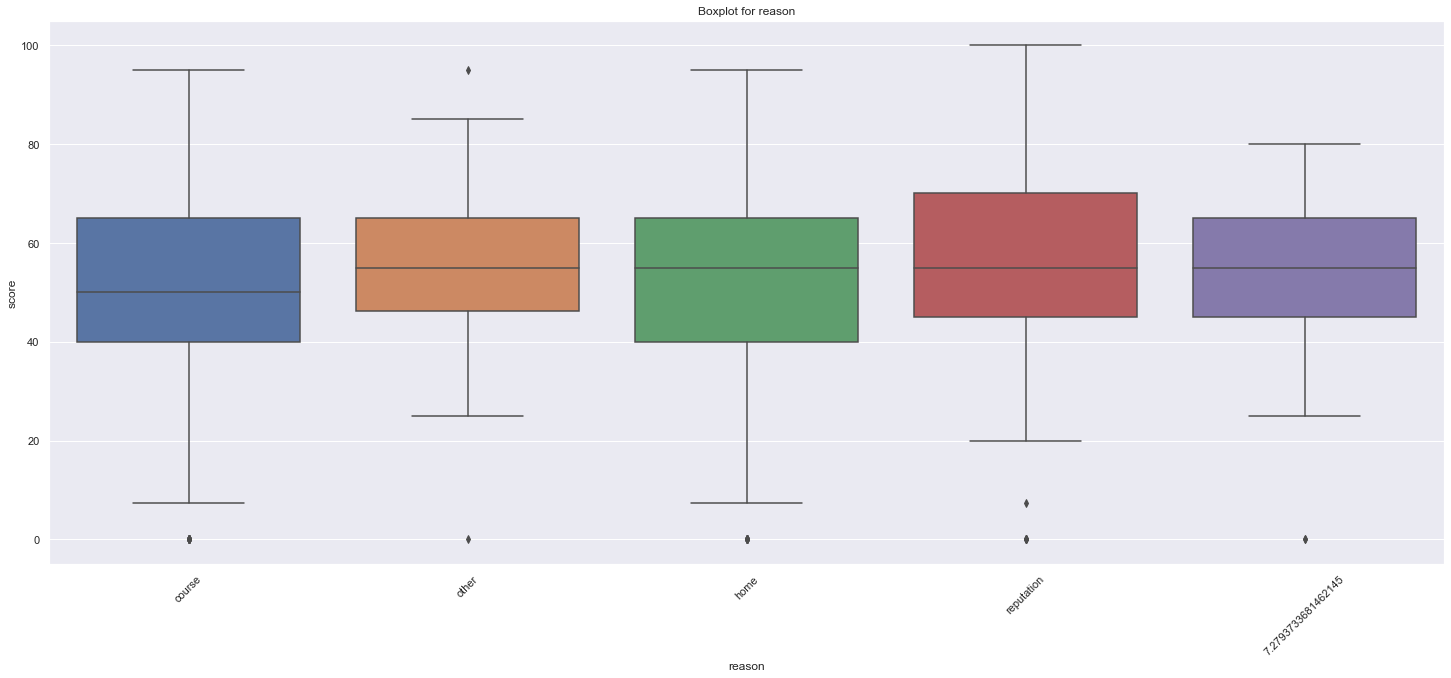

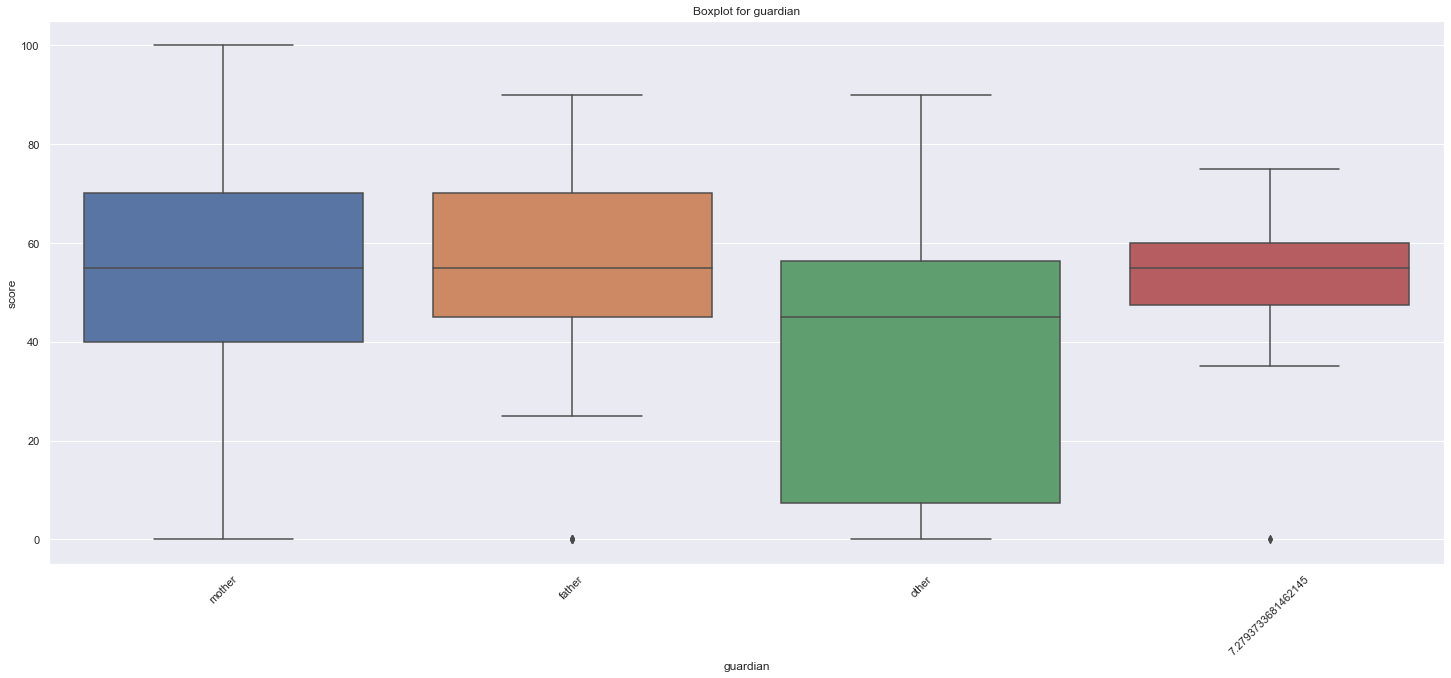

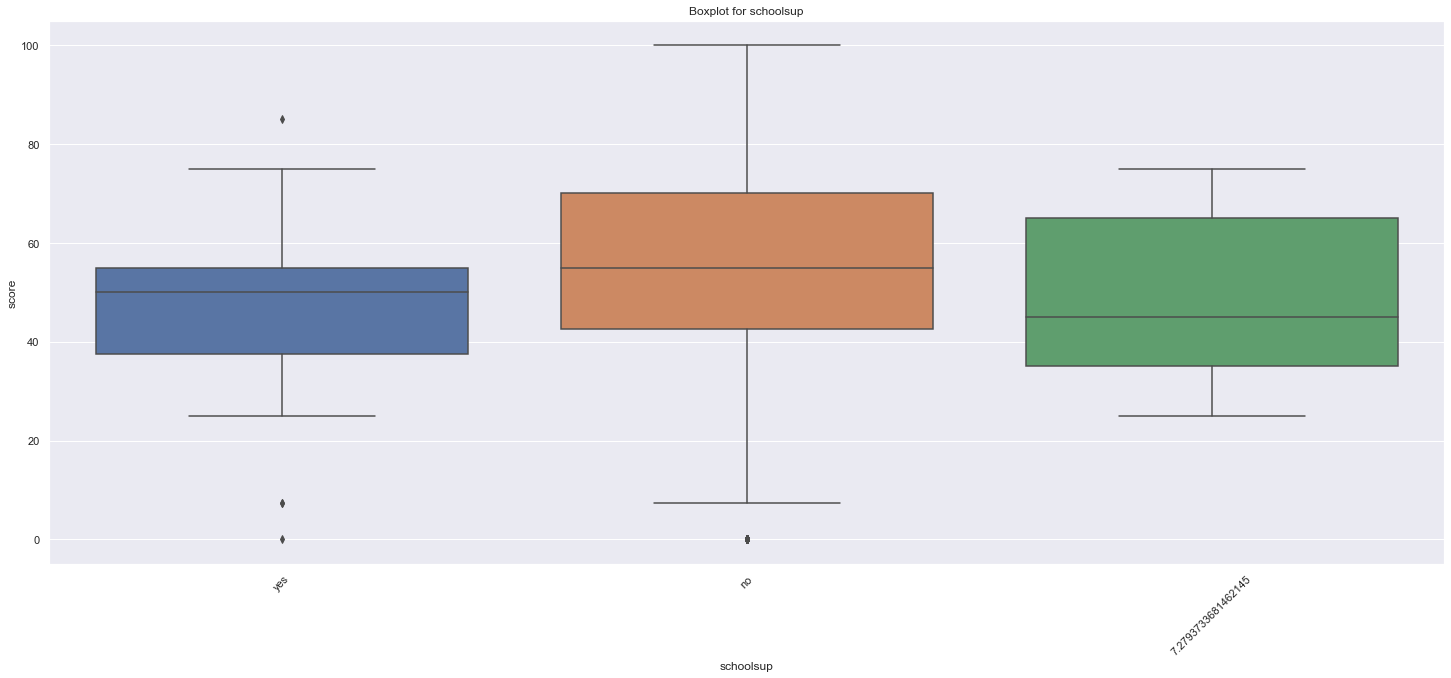

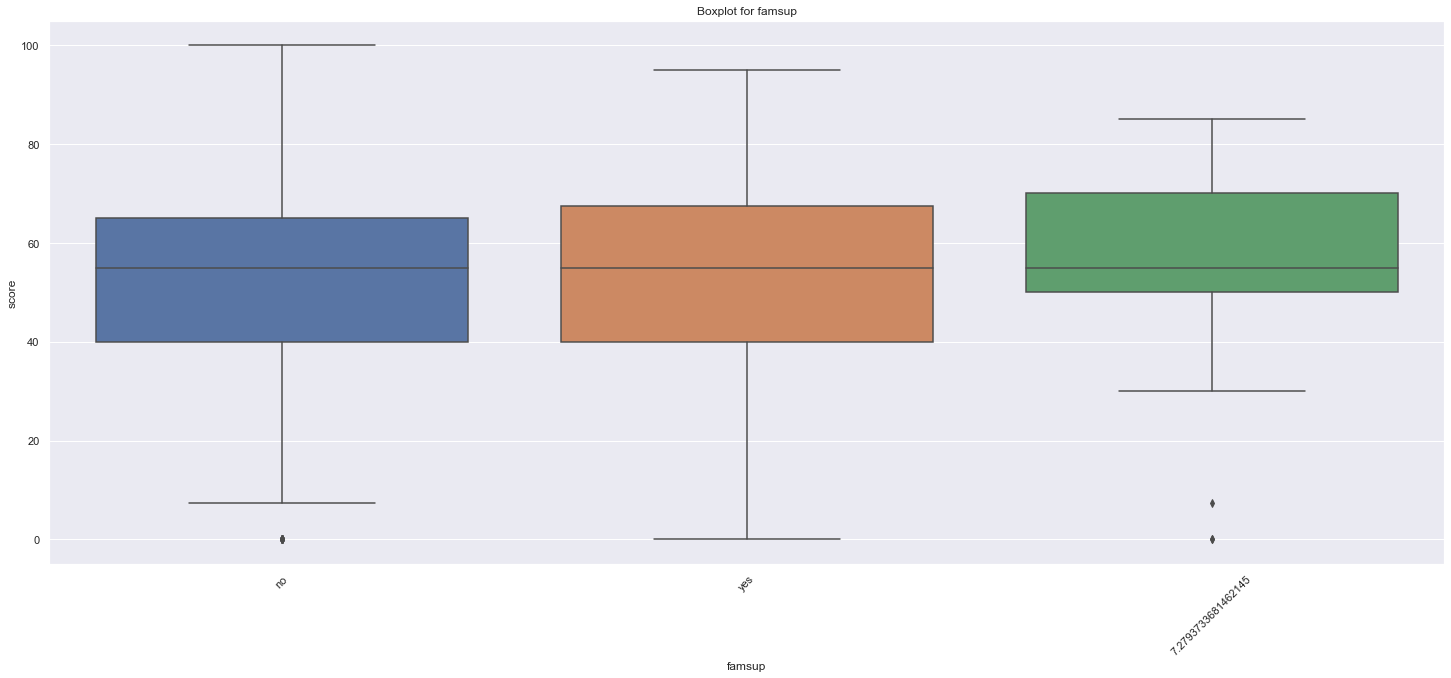

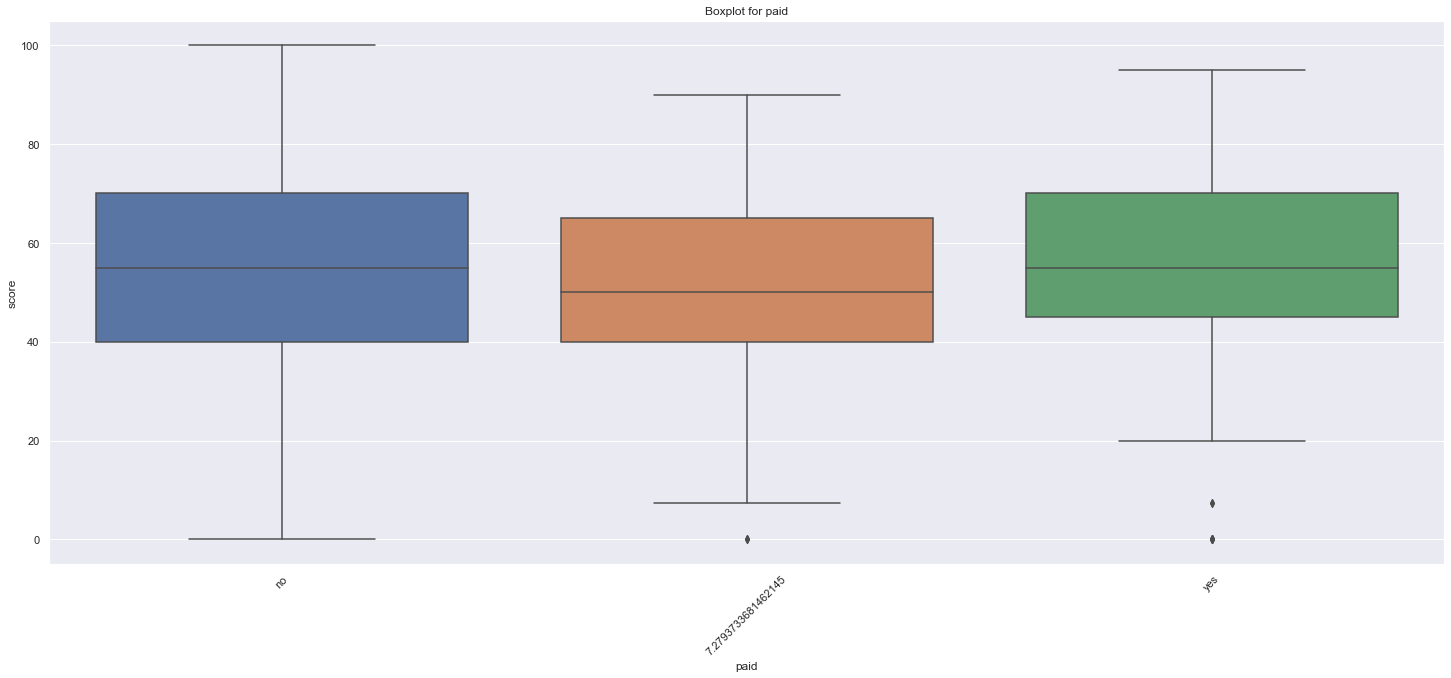

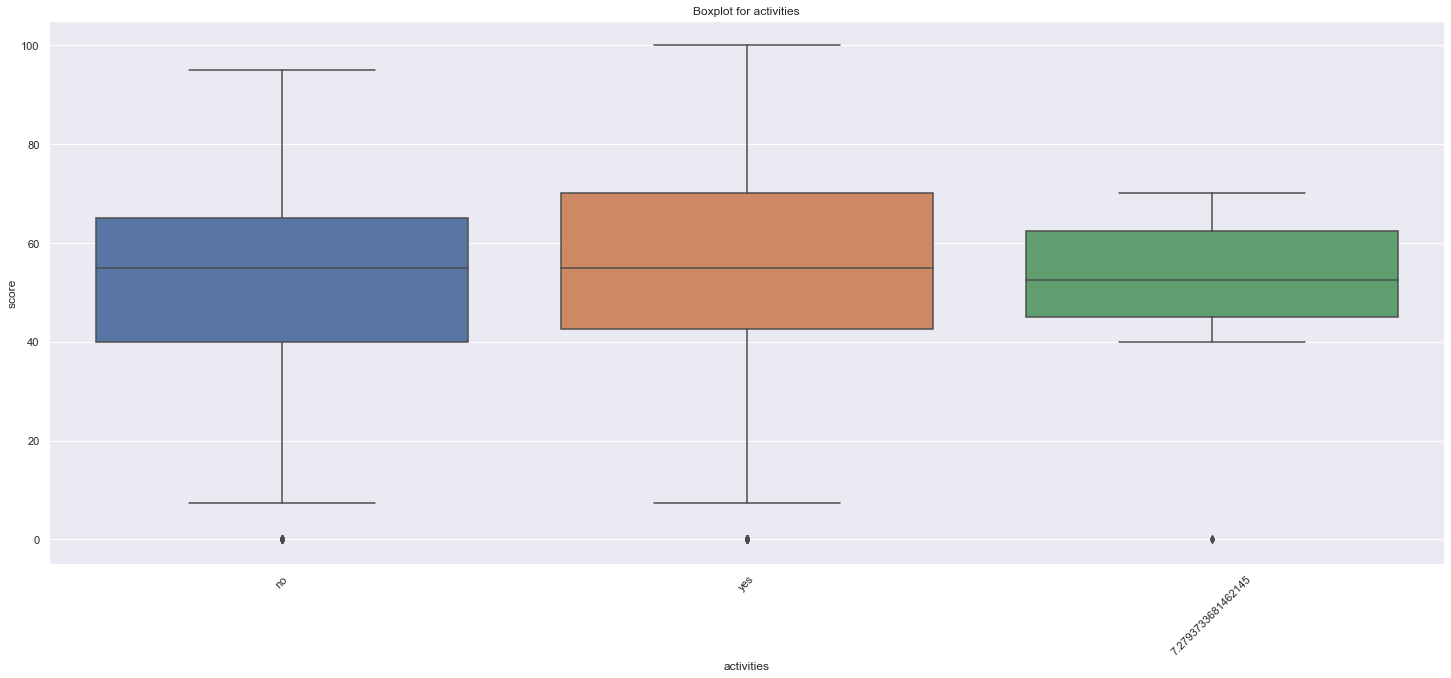

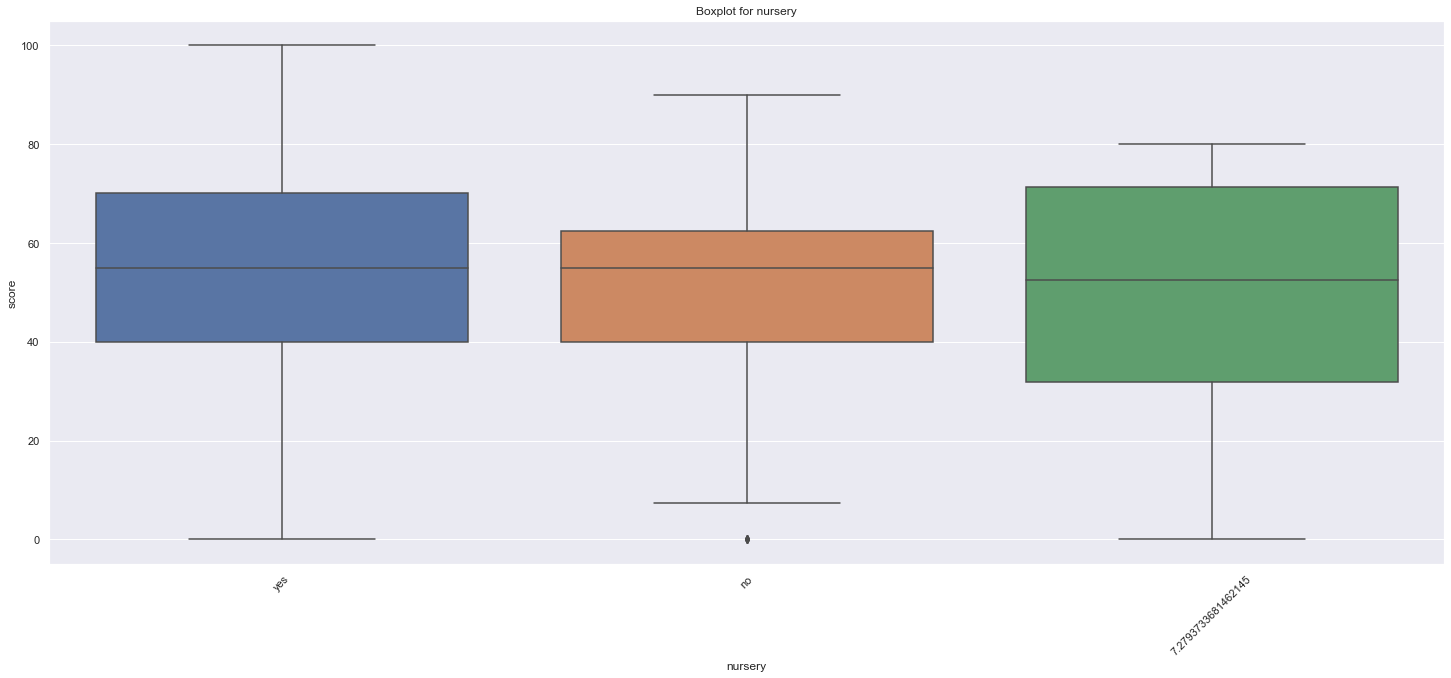

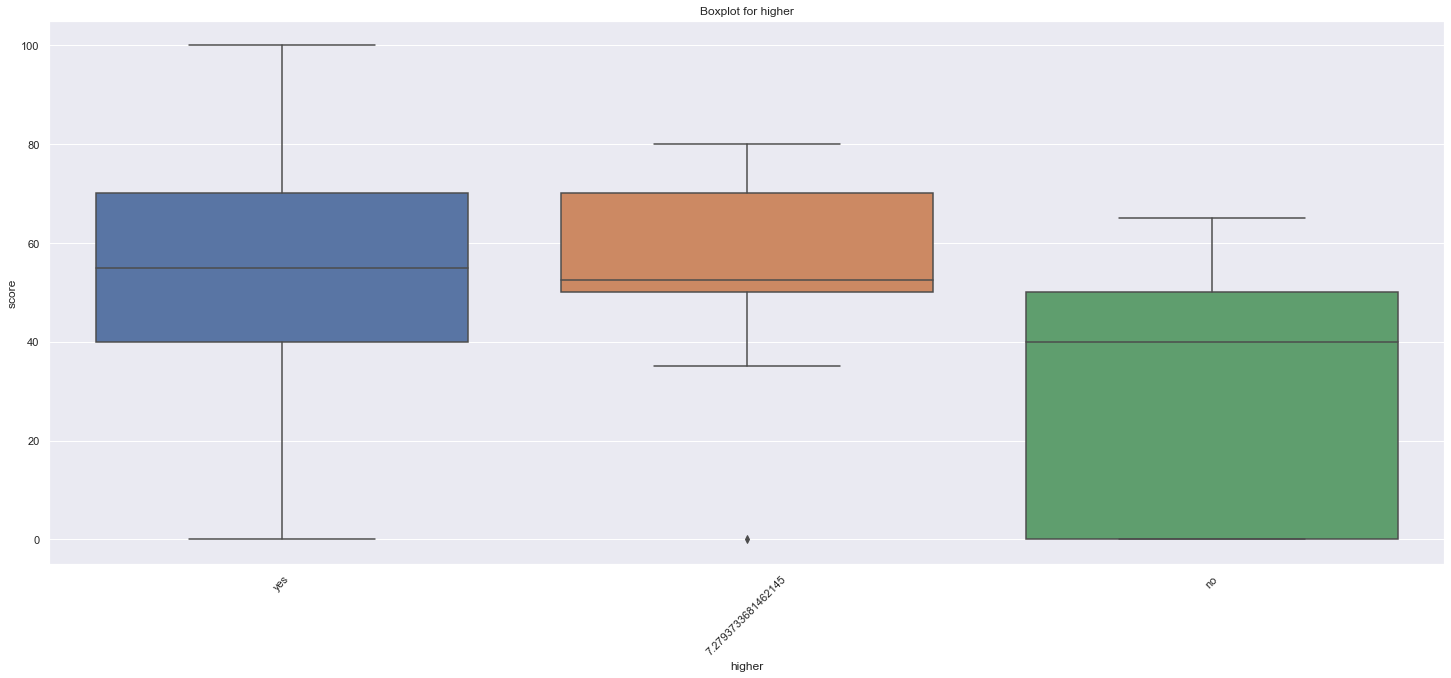

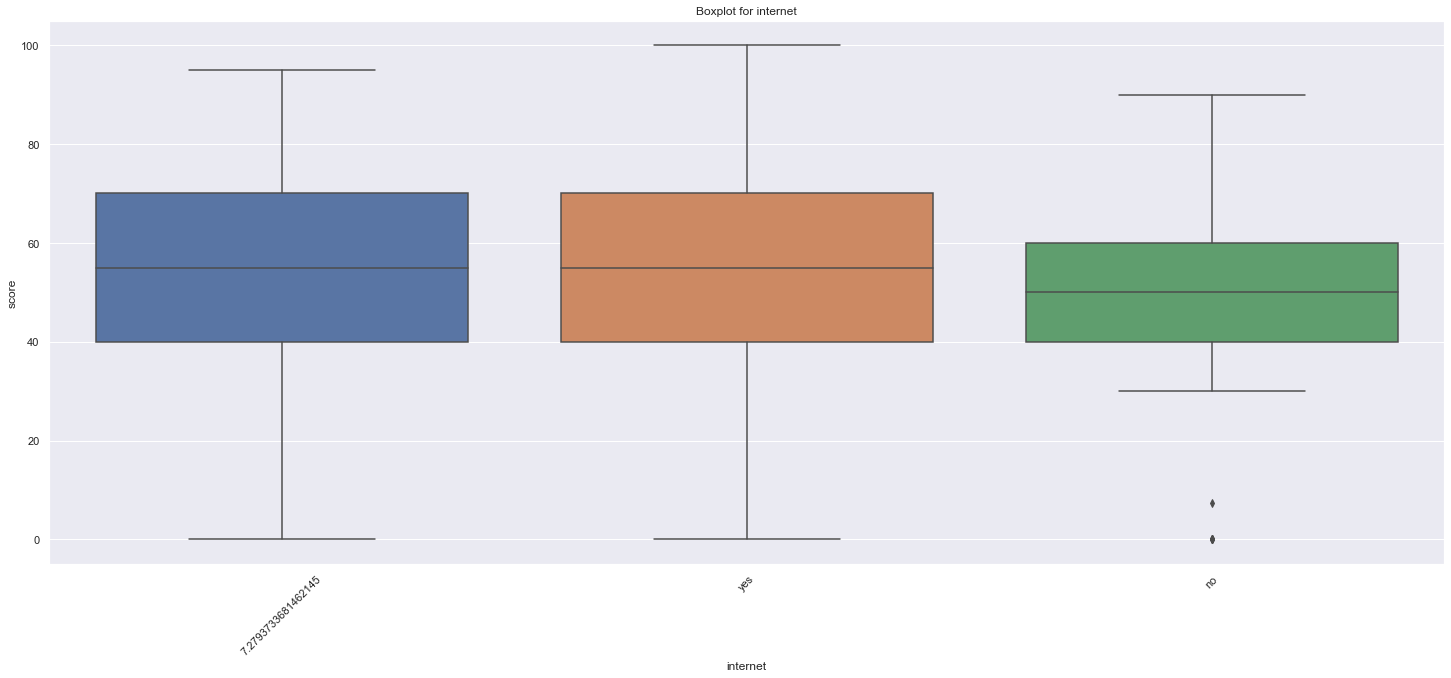

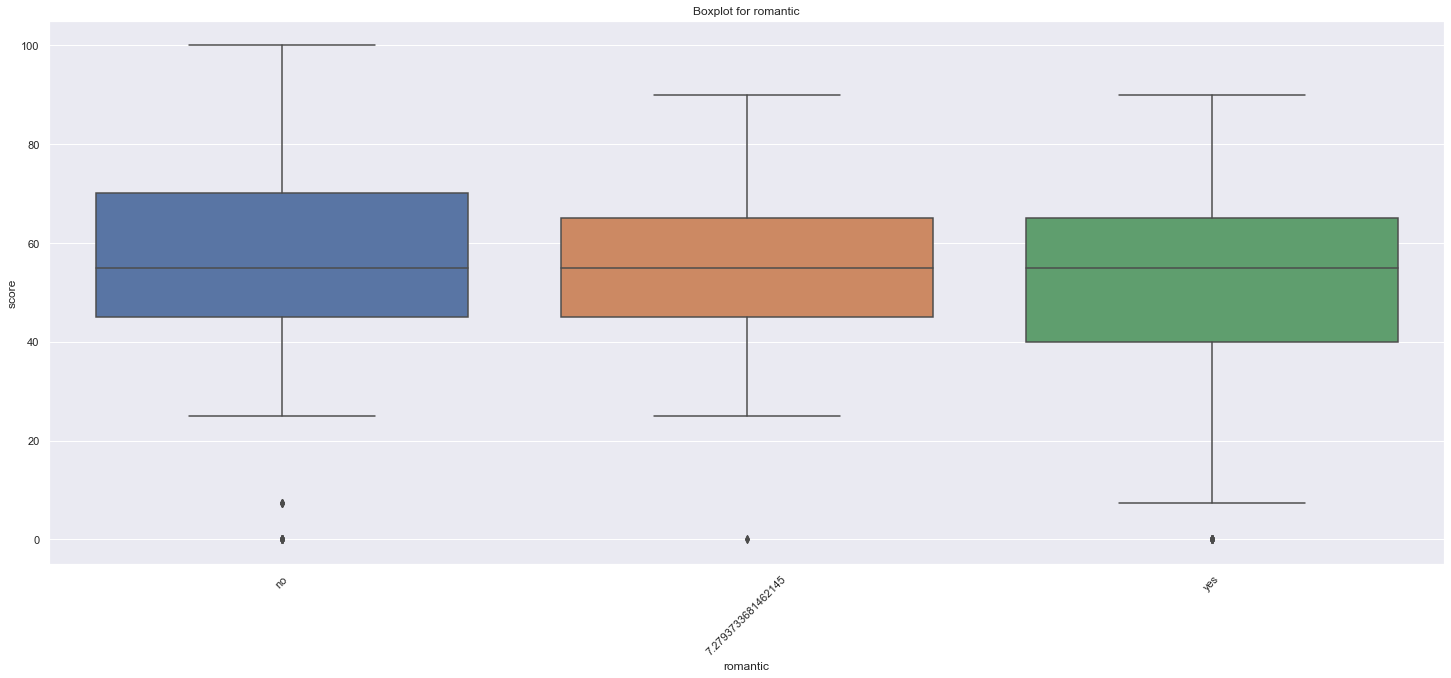

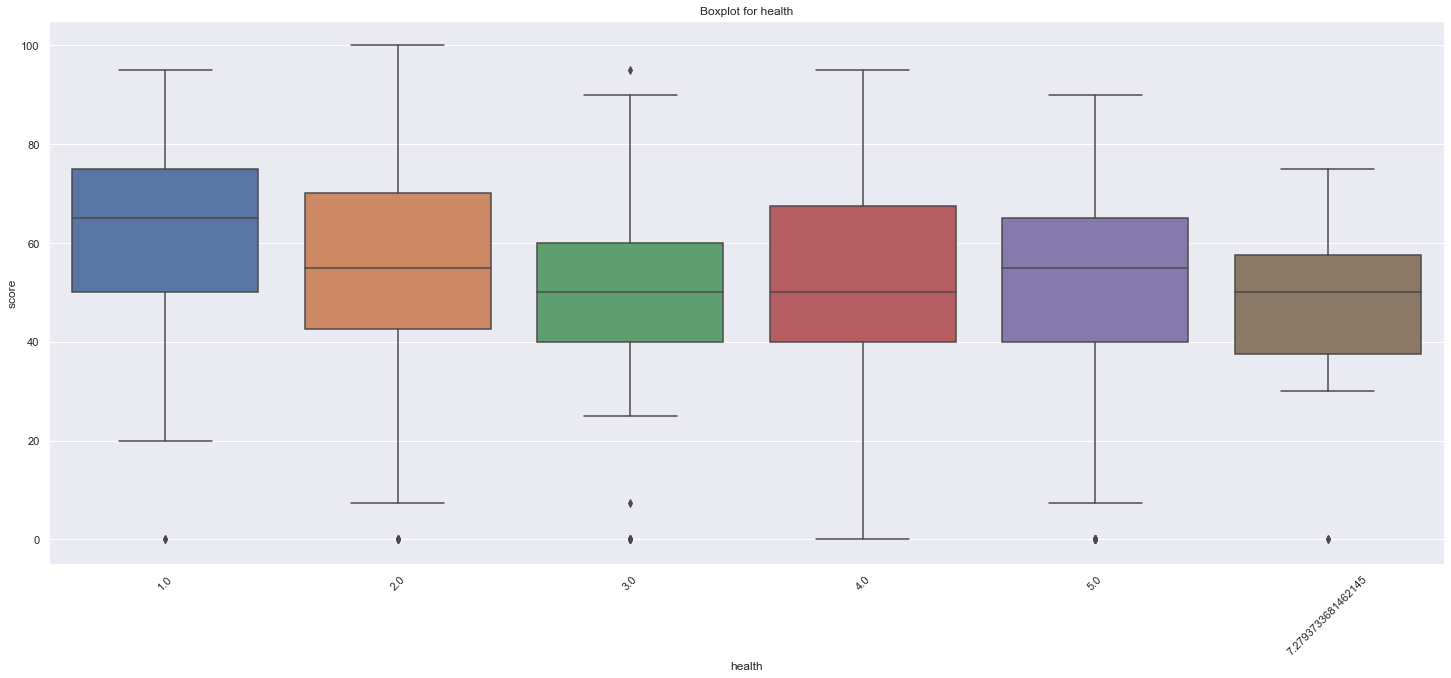

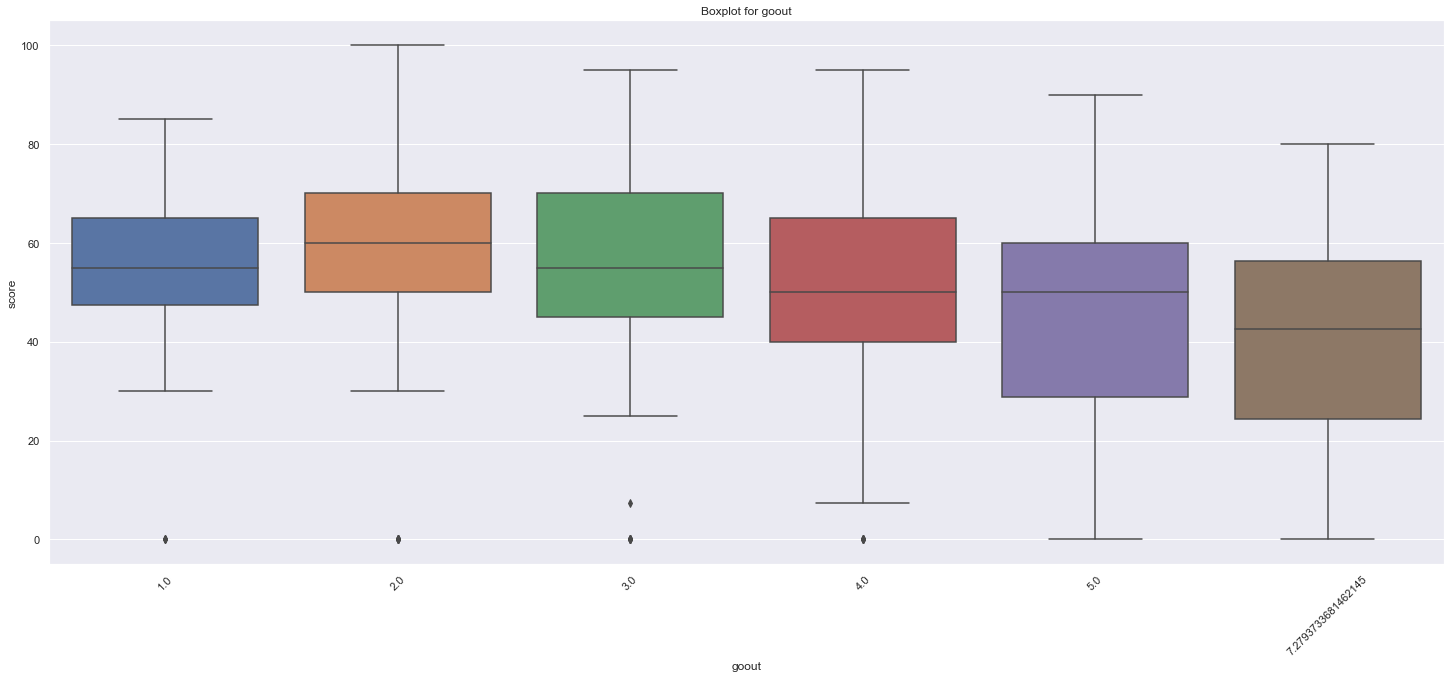

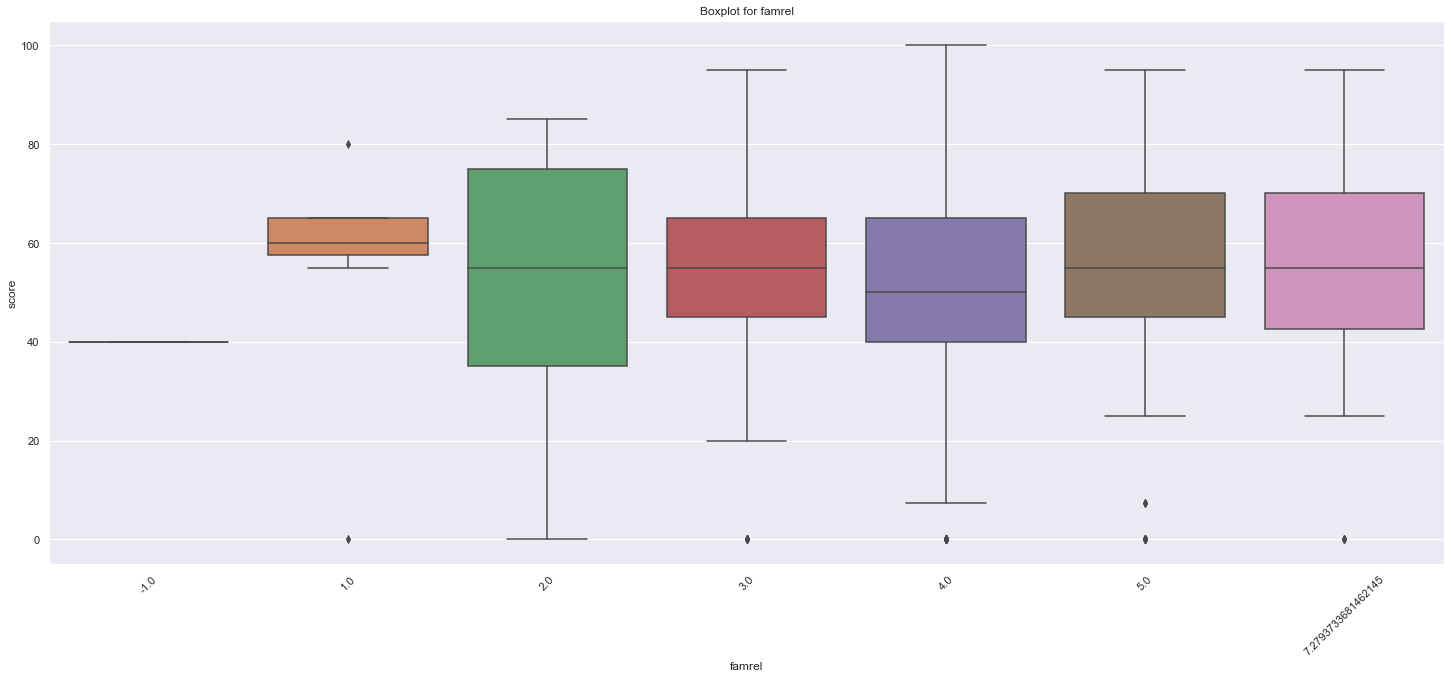

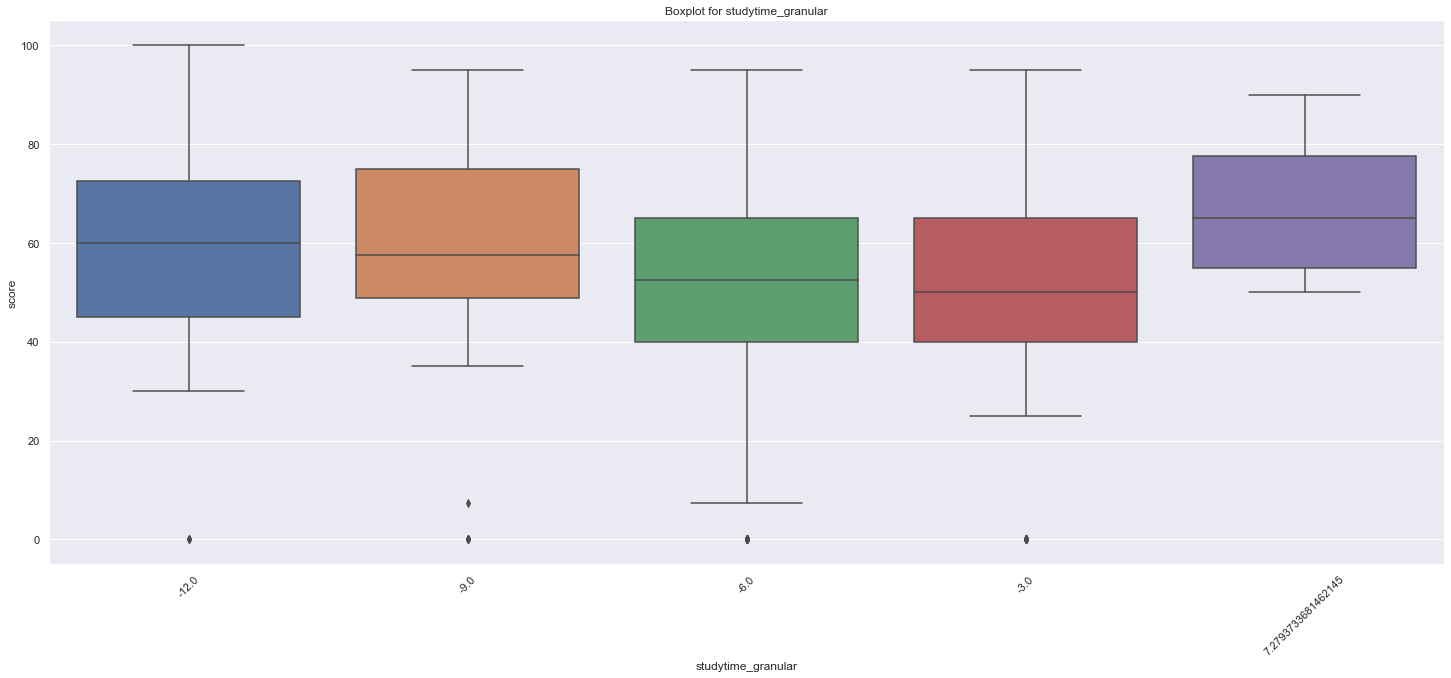

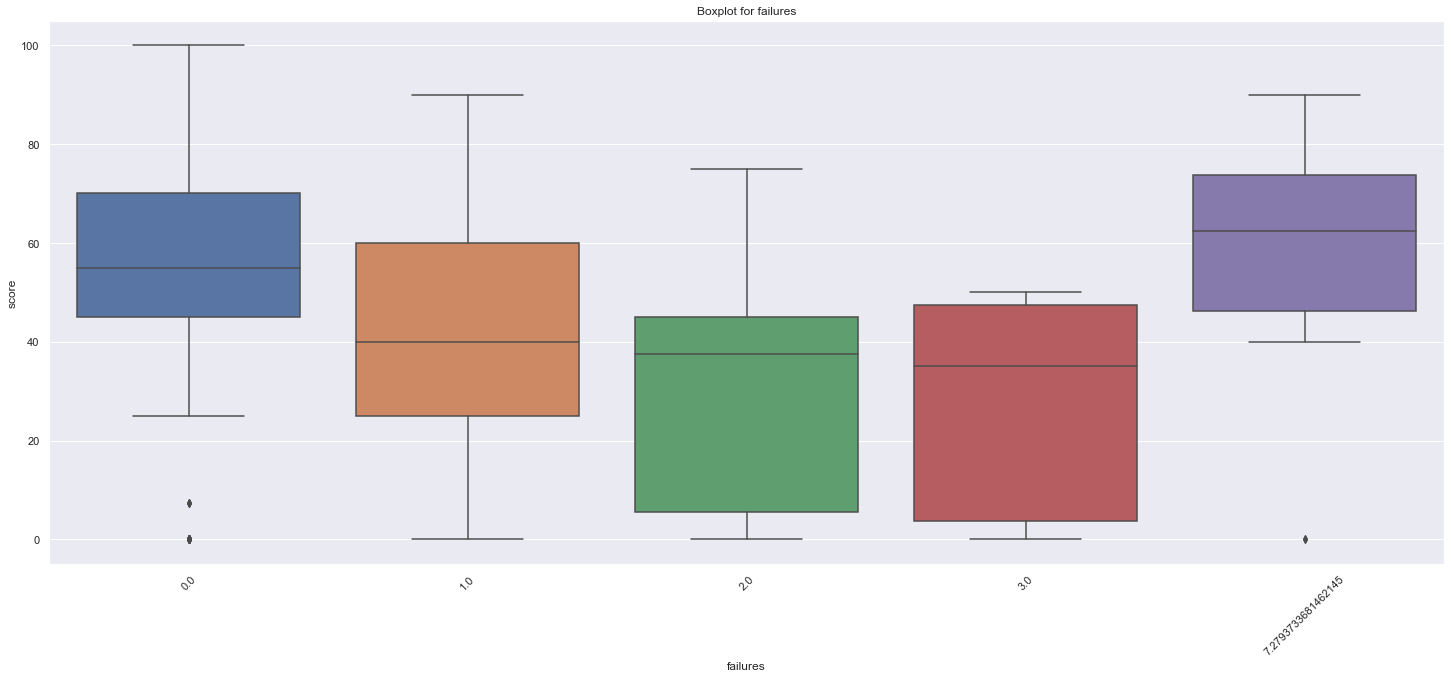

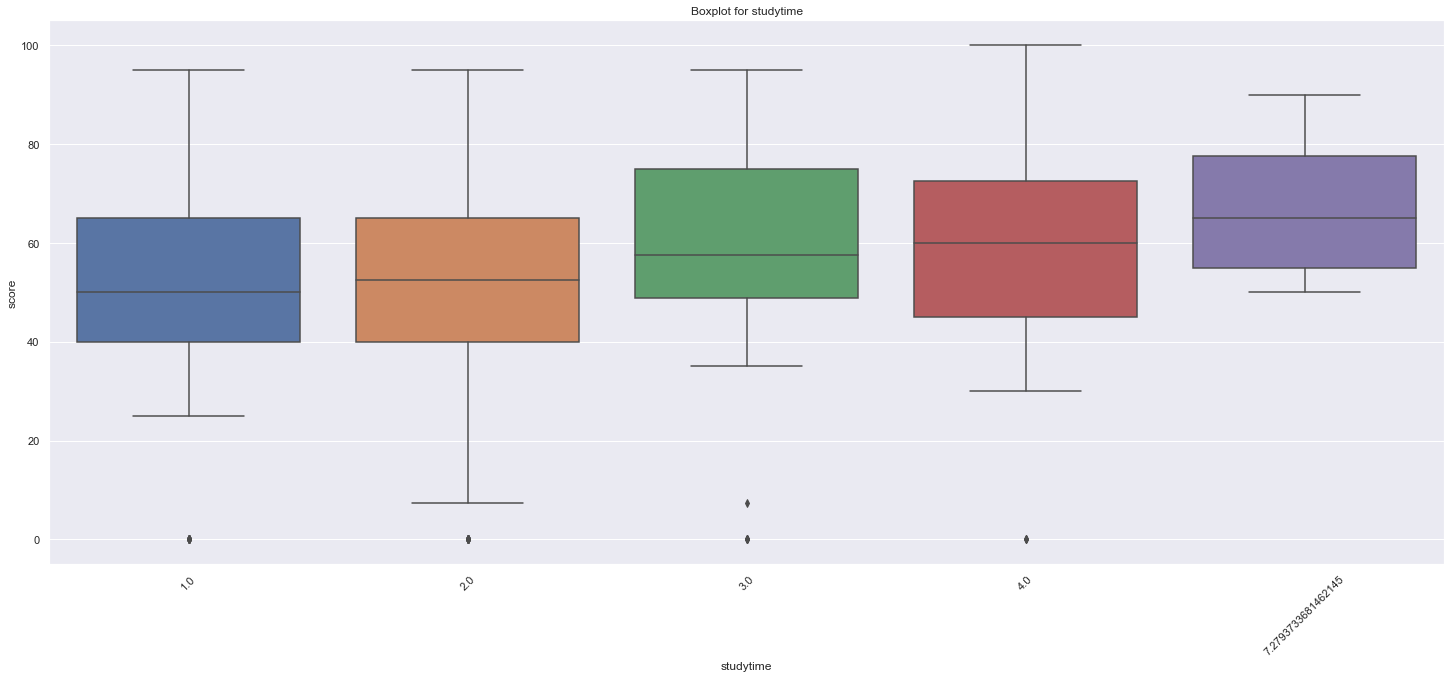

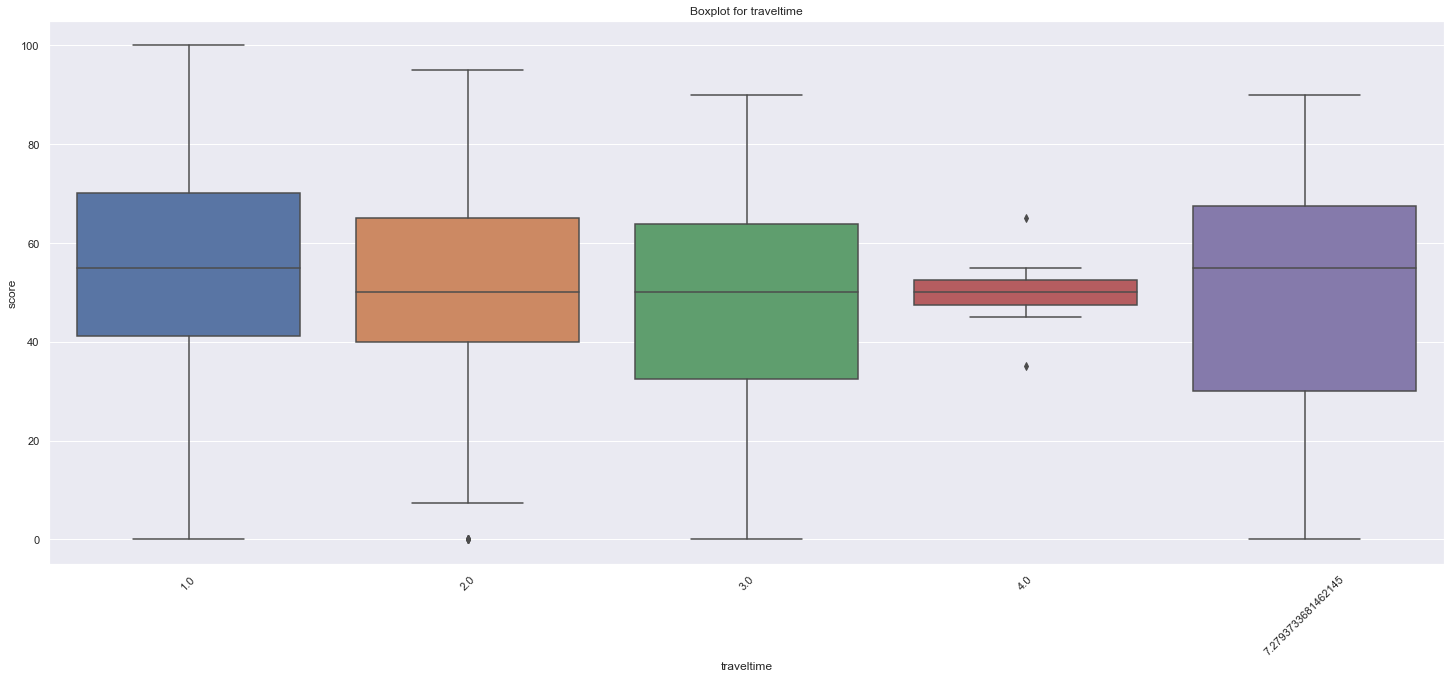

In [34]:
for column in ['school','sex', 'address', 'famsize', 'pstatus', 'mjob',
       'fjob', 'reason', 'guardian',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic',"health",  "goout", "famrel", "studytime_granular","failures", "studytime", "traveltime"]:
    get_boxplot(column)

In [35]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [36]:
for col in ['school','sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian']:
    get_stat_dif(col)

NameError: name 'combinations' is not defined

In [ ]:
Как мы видим, серьёзно отличаются 5 параметра: 'mjob', 'fjob', 'schoolsup', 'higher', 'internet',
Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные номинативные переменные, которые, возможно,
оказывают влияние на оценку, это: 'mjob', 'fjob', 'schoolsup', 'higher', 'internet',

In [ ]:
Не важные переменные(можно удалить): 'sex'(?), 'school'(?) не сильные различия, 'address'(?), 'famsize',
'Pstatus'(?), 'reason', 'guardian'(?), 'famsup', 'paid', 'activities', 'nursery', 'romantic'

In [ ]:
2.7. Выводы

Настало время подвести выводы.

Итак, в результате EDA для анализа влияния параметров шоколада на экспертную оценку шоколадных батончиков 
были получены следующие выводы:

В данных достаточно мало пустых значений, только столбец bean_type был заполнен в малом количестве случаев.
Выбросы найдены только в столбцах с рейтингом и содержанием какао в шоколаде батончиков, что позволяет сделать вывод
о том, что данные достаточно чистые.
Положительная корреляция параметра review_date и rating может говорить о том, что с годами рейтинги потихоньку
завышаются, либо батончики становятся лучше.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это company,
specific_origin, company_location, review_date и cocoa_percent.